## Modülleri İndirme

In [ ]:
pip install matplotlib seaborn plotly pandas numpy


In [ ]:
pip install openpyxl


In [ ]:
pip install scipy


In [ ]:
pip install  scipy scikit-learn imbalanced-learn xgboost


## Kütüphaneleri İmport Etme

In [ ]:
pip install scikit-learn==1.1.3 imbalanced-learn==0.9.1


In [ ]:
!pip uninstall scikit-learn imbalanced-learn -y
!pip install scikit-learn==1.1.3 imbalanced-learn==0.9.1


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier, early_stopping
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold


## Veri Okuma 

In [2]:
file_path = r"C:\Users\Selim\Desktop\musteri_terk.csv"

df = pd.read_csv(file_path, sep=';', encoding='cp1254')  # encoding'yi önceki önerilere göre ayarlayabilirsiniz


In [3]:
df.replace(to_replace=['?', ' ?'], value=np.nan, inplace=True)


In [4]:
df.head()

Column1  musteri_terk_drm  musterilik_yas  maas_flag  must_hesap_sube_sayi  \
0        0                 0              42          0                     1   
1        1                 0              55          0                     1   
2        2                 0              30          1                     1   
3        3                 0              15          1                     1   
4        4                 0             202          1                     1   

   kanuni_takip_drm  hesap_isl_ucret_flag  vdsz_deg_1  vdsz_deg_2  vdli_deg_1  \
0                 0                     0          -4          81           0   
1                 0                     2           0           0           0   
2                 0                     0         -35         -25           0   
3                 0                     0         121         289           0   
4                 0                     0         -55        2579           0   

   ...  chrn_sikayet_son_ay_sayi  chrn_sikayet_son_3ay_sayi  \
0  ...                       NaN                        NaN   
1  ...                       NaN                        NaN   
2  ...                       NaN                        NaN   
3  ...                       NaN                        NaN   
4  ...                       NaN                        NaN   

   chrn_sikayet_son_6ay_sayi  chrn_sikayet_son_12ay_sayi  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   

  chrn_must_yakin_izleme_acik_flag  ref_yas       ref_meslek  ref_egitimdurum  \
0                                0       48       ÇALIŞMIYOR         ORTAOKUL   
1                                0       52        EV HANIMI          İLKOKUL   
2                                0       23    KAMU ÇALIŞANI         ORTAOKUL   
3                                0       58       ÇALIŞMIYOR          İLKOKUL   
4                                0       78  SERBEST ÇALIŞAN         TANIMSIZ   

   ref_medenidurum  cinsiyet  
0             EVLI     Erkek  
1             EVLI     Kadın  
2             EVLI     Kadın  
3              DUL     Kadın  
4              DUL     Kadın  

[5 rows x 35 columns]

In [5]:
df.shape

(12931, 35)

In [6]:
df.describe()

Column1  musteri_terk_drm  musterilik_yas     maas_flag  \
count  12931.0000      12931.000000    12931.000000  12931.000000   
mean    6465.0000          0.046864      125.678524      0.360297   
std     3733.0025          0.211356       82.937657      0.480105   
min        0.0000          0.000000        0.000000      0.000000   
25%     3232.5000          0.000000       49.000000      0.000000   
50%     6465.0000          0.000000      136.000000      0.000000   
75%     9697.5000          0.000000      186.000000      1.000000   
max    12930.0000          1.000000      351.000000      1.000000   

       must_hesap_sube_sayi  kanuni_takip_drm  hesap_isl_ucret_flag  \
count          12931.000000      12931.000000          12931.000000   
mean               1.276699          0.001701              0.159307   
std                0.659863          0.041214              0.615087   
min                0.000000          0.000000              0.000000   
25%                1.000000          0.000000              0.000000   
50%                1.000000          0.000000              0.000000   
75%                1.000000          0.000000              0.000000   
max               11.000000          1.000000             11.000000   

         vdsz_deg_1    vdsz_deg_2    vdli_deg_1  ...  kkisl_tut_degisim_v1  \
count  1.293100e+04  1.293100e+04  12931.000000  ...          12931.000000   
mean   1.113282e+03  1.487436e+03      2.836826  ...             18.909288   
std    2.274930e+04  7.363243e+04    119.540534  ...            619.006574   
min   -9.900000e+01 -9.900000e+01    -99.000000  ...           -112.000000   
25%   -7.000000e+00 -5.000000e+00      0.000000  ...              0.000000   
50%    0.000000e+00  0.000000e+00      0.000000  ...              0.000000   
75%    2.100000e+01  3.200000e+01      0.000000  ...              0.000000   
max    1.147206e+06  8.093789e+06   9207.000000  ...          39086.000000   

       kkisl_tut_degisim_v2  kkisl_sy_degisim_v1  kkisl_sy_degisim_v2  \
count          12931.000000         12931.000000         12931.000000   
mean               4.071302             0.315289             0.318846   
std               65.257363            19.374195            19.387042   
min              -99.000000          -112.000000           -98.000000   
25%                0.000000             0.000000             0.000000   
50%                0.000000             0.000000             0.000000   
75%                0.000000             0.000000             0.000000   
max             2331.000000           475.000000           688.000000   

       harcananpuan_degisim_v1  harcananpuan_degisim_v2  \
count             12931.000000             12931.000000   
mean                  4.169051                 7.001315   
std                 272.192672               621.228781   
min                 -98.000000               -97.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               26579.000000             67057.000000   

       acıkurunadet_degisim_v1  acıkurunadet_degisim_v2  \
count             12931.000000             12931.000000   
mean                  0.599799               -27.421545   
std                  13.916489                15.205377   
min                 -88.000000               -89.000000   
25%                   0.000000               -33.000000   
50%                   0.000000               -33.000000   
75%                   0.000000               -33.000000   
max                 483.000000               633.000000   

       chrn_must_yakin_izleme_acik_flag       ref_yas  
count                      12931.000000  12931.000000  
mean                           0.004795     48.744877  
std                            0.069080     20.506444  
min                            0.000000      0.000000  
25%                            0.000000    

In [7]:
df['musteri_terk_drm'].sum()


606

In [8]:
df["musteri_terk_drm"].value_counts(normalize=True)


0    0.953136
1    0.046864
Name: musteri_terk_drm, dtype: float64

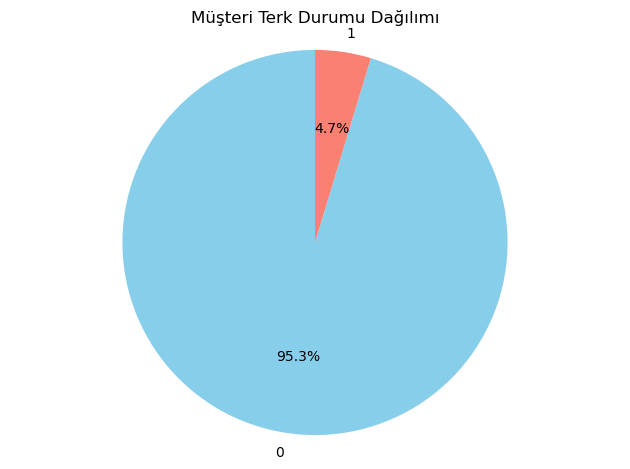

In [9]:
terk_oran = df["musteri_terk_drm"].value_counts(normalize=True)
terk_oran.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Müşteri Terk Durumu Dağılımı")
plt.ylabel("")  # y-label gizle
plt.axis('equal')  
plt.tight_layout()
plt.show()


#### imbalance değişken

## İstatiksel Dağılım ve Korelasyon bakma 

In [10]:
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col != 'Unnamed: 0']


In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    data = df[col].dropna()
    stat, p = stats.shapiro(data)
    
    if p > 0.05:
        print(f"{col}: Normal dağılıma uyuyor (p = {p:.4f})")
    else:
        print(f"{col}: Normal dağılıma uymuyor (p = {p:.4f})")




Column1: Normal dağılıma uymuyor (p = 0.0000)
musteri_terk_drm: Normal dağılıma uymuyor (p = 0.0000)
musterilik_yas: Normal dağılıma uymuyor (p = 0.0000)
maas_flag: Normal dağılıma uymuyor (p = 0.0000)
must_hesap_sube_sayi: Normal dağılıma uymuyor (p = 0.0000)
kanuni_takip_drm: Normal dağılıma uymuyor (p = 0.0000)
hesap_isl_ucret_flag: Normal dağılıma uymuyor (p = 0.0000)
vdsz_deg_1: Normal dağılıma uymuyor (p = 0.0000)
vdsz_deg_2: Normal dağılıma uymuyor (p = 0.0000)
vdli_deg_1: Normal dağılıma uymuyor (p = 0.0000)
vdli_deg_2: Normal dağılıma uymuyor (p = 0.0000)
kk_borc_deg_v1: Normal dağılıma uymuyor (p = 0.0000)
kk_borc_deg_v2: Normal dağılıma uymuyor (p = 0.0000)
borc_degisim_v1: Normal dağılıma uymuyor (p = 0.0000)
gecikmeflag_degisim_v1: Normal dağılıma uymuyor (p = 0.0000)
gecikmeflag_degisim_v2: Normal dağılıma uymuyor (p = 0.0000)
kkisl_tut_degisim_v1: Normal dağılıma uymuyor (p = 0.0000)
kkisl_tut_degisim_v2: Normal dağılıma uymuyor (p = 0.0000)
kkisl_sy_degisim_v1: Normal d

c:\Users\selim\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                                   Column1  musteri_terk_drm  musterilik_yas  \
Column1                           1.000000         -0.009172       -0.001000   
musteri_terk_drm                 -0.009172          1.000000       -0.011524   
musterilik_yas                   -0.001000         -0.011524        1.000000   
maas_flag                        -0.000155         -0.162601        0.389975   
must_hesap_sube_sayi              0.008246         -0.149827        0.032090   
kanuni_takip_drm                 -0.000078          0.035239        0.003361   
hesap_isl_ucret_flag              0.009780         -0.028877        0.002356   
vdsz_deg_1                        0.010268         -0.018390        0.014869   
vdsz_deg_2                       -0.013186         -0.017972        0.080624   
vdli_deg_1                       -0.006530         -0.008125        0.095457   
vdli_deg_2                       -0.014144         -0.010947        0.096311   
kk_borc_deg_v1                    0.0114

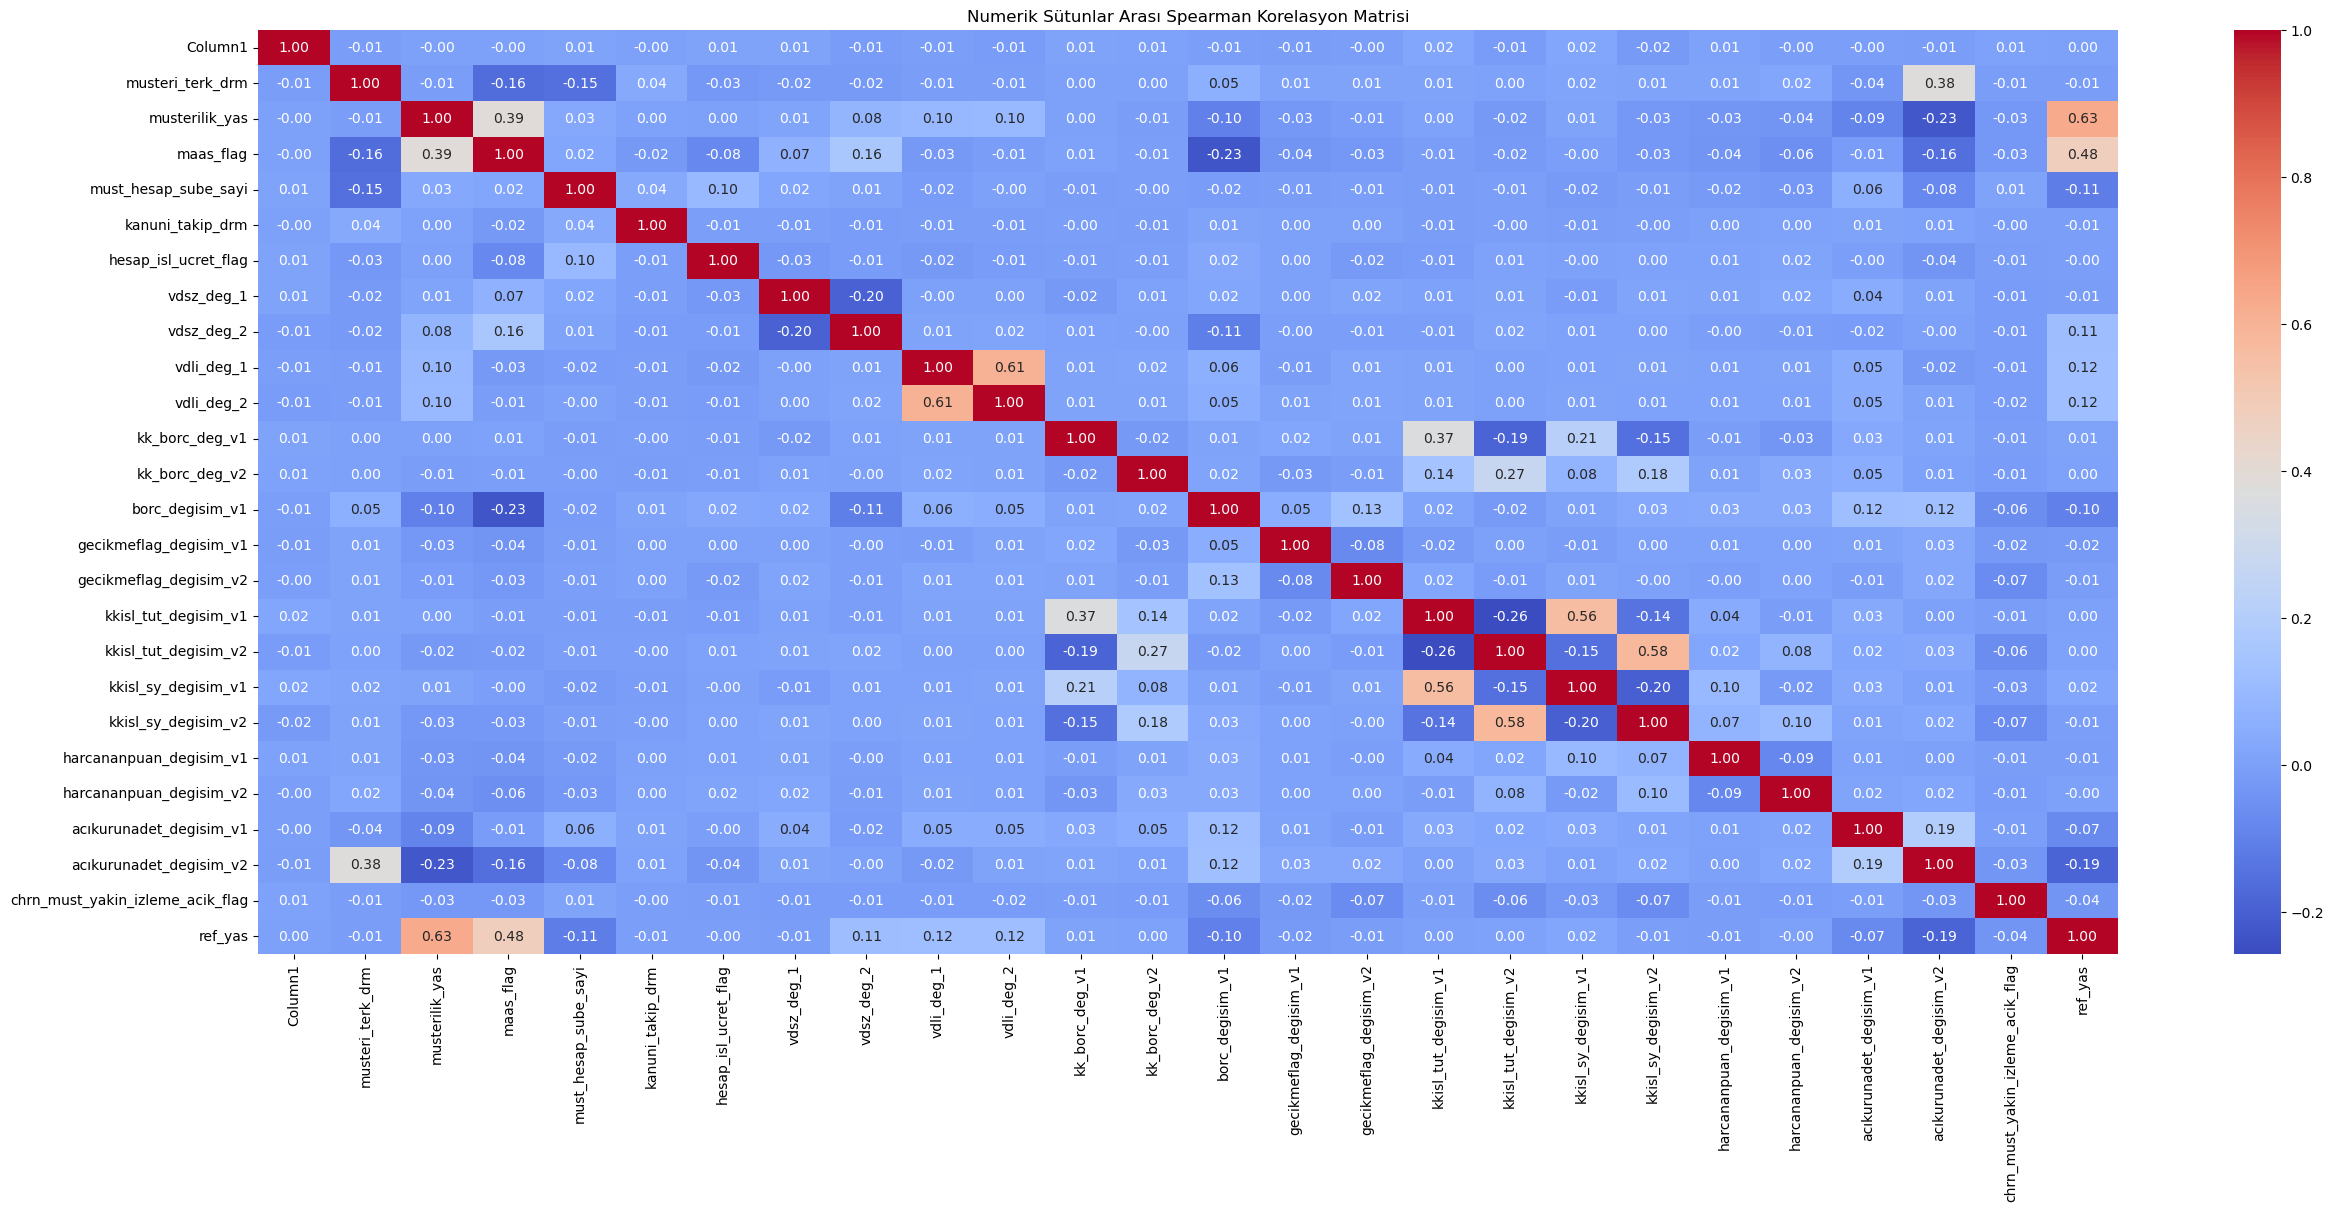

In [12]:
numeric_cols = df.select_dtypes(include=['number'])

spearman_corr = numeric_cols.corr(method='spearman')

print(spearman_corr)

plt.figure(figsize=(30,12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerik Sütunlar Arası Spearman Korelasyon Matrisi')
plt.show()

In [13]:
numeric_cols = df.select_dtypes(include=['number'])

spearman_corr = numeric_cols.corr(method='spearman')

threshold = 0.50
corr_pairs = []

for i in range(len(spearman_corr.columns)):
    for j in range(i+1, len(spearman_corr.columns)):
        col1 = spearman_corr.columns[i]
        col2 = spearman_corr.columns[j]
        corr_value = spearman_corr.iloc[i, j]
        if abs(corr_value) > threshold:
            corr_pairs.append((col1, col2, corr_value))

for col1, col2, corr_val in corr_pairs:
    print(f"{col1} ile {col2} arasında korelasyon: {corr_val:.3f}")


musterilik_yas ile ref_yas arasında korelasyon: 0.630
vdli_deg_1 ile vdli_deg_2 arasında korelasyon: 0.606
kkisl_tut_degisim_v1 ile kkisl_sy_degisim_v1 arasında korelasyon: 0.559
kkisl_tut_degisim_v2 ile kkisl_sy_degisim_v2 arasında korelasyon: 0.581


In [14]:

df = df.fillna(0)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)


In [15]:
df = df.drop(columns=["Unnamed: 0"], errors='ignore')


# ---- Feature Engineering Fonksiyonu

In [16]:
def feature_engineering(df):
    df = df.copy()
    # Yaş kategorileri
    def yas_kategorisi(yas):
        if yas < 30:
            return "genç"
        elif 30 <= yas < 50:
            return "orta_yas"
        else:
            return "yasli"
    df["musterilik_yas_kat"] = df["musterilik_yas"].apply(yas_kategorisi)
    df["sube_sayisi_orani"] = df["must_hesap_sube_sayi"] / (df["musterilik_yas"] + 1)
    df["maas_ve_kanuni_takip"] = np.where(
        (df["maas_flag"] == 1) & (df["kanuni_takip_drm"] == 1), 1, 0)
    df["ucret_alan_maasli"] = np.where(
        (df["hesap_isl_ucret_flag"] == 1) & (df["maas_flag"] == 1), 1, 0)
    df = pd.get_dummies(df, columns=["musterilik_yas_kat"], drop_first=True)
    return df

## Label Encoding Ang Getting Dummy variables

In [17]:
df['ref_medenidurum'].value_counts()

EVLI        8070
BEKAR       2963
DUL         1451
BOŞANMIŞ     296
TANIMSIZ      91
0             60
Name: ref_medenidurum, dtype: int64

In [18]:
df_dummies = pd.get_dummies(df["ref_medenidurum"], prefix="ref_medenidurum")

df = pd.concat([df, df_dummies], axis=1)


medenidurum_map = {
    "EVLI": 0,
    "BEKAR": 1,
    "DUL": 2,
    "BOŞANMIŞ": 3,
    "TANIMSIZ": 4,
    "0": 5
}

df["ref_medenidurum_encoded"] = df["ref_medenidurum"].map(medenidurum_map)

In [19]:
cinsiyet_map = {
    "KADIN": 0,
    "ERKEK": 1
}

df["ref_cinsiyet_encoded"] = df["cinsiyet"].map(cinsiyet_map)


### Define Your Model Input X & Y

In [20]:
df['borc_degisim_v2'] = pd.to_numeric(df['borc_degisim_v2'], errors='coerce')
df['chrn_sikayet_son_ay_sayi'] = pd.to_numeric(df['chrn_sikayet_son_ay_sayi'], errors='coerce')
df['chrn_sikayet_son_3ay_sayi'] = pd.to_numeric(df['chrn_sikayet_son_3ay_sayi'], errors='coerce')
df['chrn_sikayet_son_6ay_sayi'] = pd.to_numeric(df['chrn_sikayet_son_6ay_sayi'], errors='coerce')
df['chrn_sikayet_son_12ay_sayi'] = pd.to_numeric(df['chrn_sikayet_son_12ay_sayi'], errors='coerce')


In [21]:
X = df.drop(["musteri_terk_drm", "ref_meslek","ref_egitimdurum","ref_medenidurum","cinsiyet"], axis=1)
y = df["musteri_terk_drm"]

In [22]:
# '?' olanları NaN yap
df.replace('?', np.nan, inplace=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


## Train Test Split

In [23]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.4, random_state=42)


In [24]:
X_train_fe = feature_engineering(X_train)
X_val_fe = feature_engineering(X_val)
X_test_fe = feature_engineering(X_test)

### Model Metrik Skor Hesaplama Fonksiyonu

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("-" * 30)

In [26]:
X_train_fe = X_train_fe.fillna(0)


In [27]:
from sklearn.impute import SimpleImputer

# Eksik değerleri median ile doldur
imputer = SimpleImputer(strategy='median')
X_train_fe = pd.DataFrame(imputer.fit_transform(X_train_fe), columns=X_train_fe.columns)
X_val_fe = pd.DataFrame(imputer.transform(X_val_fe), columns=X_val_fe.columns)
X_test_fe = pd.DataFrame(imputer.transform(X_test_fe), columns=X_test_fe.columns)


## Define hyperparameters and run the model

model = XGBClassifier(**xgb_params)
model.set_params(early_stopping_rounds=10)

model.fit(
    X_train_fe_sm, y_train_sm,
    eval_set=[(X_val_fe, y_val)],
    verbose=True
)


### Xgb Optunasız

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 1. SMOTE uygulama (sadece train setine)
smote = SMOTE(random_state=42)
X_train_fe_sm, y_train_sm = smote.fit_resample(X_train_fe, y_train)

# 2. Model parametreleri
xgb_params = {
    "max_depth": 3,               # Daha sığ ağaçlar → daha az ezberleme
    "min_child_weight": 10,       # Yaprak başına daha fazla örnek → daha genel model
    "gamma": 0.5,                 # Daha yüksek dallanma cezası
    "reg_lambda": 10,             # L2 düzenlemesini artırdım
    "reg_alpha": 5,               # L1 düzenlemesini artırdım
    "subsample": 0.7,             
    "colsample_bytree": 0.7,      
    "use_label_encoder": False,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_estimators": 190
}


# 3. Modeli tanımla
model = XGBClassifier(**xgb_params)

# 4. Erken durdurma için doğrulama seti
eval_set = [(X_val_fe, y_val)]

# 5. Modeli eğit
model.fit(
    X_train_fe_sm, y_train_sm,
    eval_set=[(X_val_fe, y_val)],
  #  early_stopping_rounds=10,
    verbose=True
)

# 6. Performans çıktısı (test seti)
print("Model Performansı (Test Seti):")
evaluate_model(model, X_test_fe, y_test)


In [ ]:
print("Model Performansı TRAİN:")
evaluate_model(model, X_train_fe, y_train)

In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 1. SMOTE uygulama (sadece train setine)
smote = SMOTE(random_state=42)
X_train_fe_sm, y_train_sm = smote.fit_resample(X_train_fe, y_train)

# 2. Model parametreleri
xgb_params = {
    "max_depth": 3,               # Daha sığ ağaçlar → daha az ezberleme
    "min_child_weight": 10,       # Yaprak başına daha fazla örnek → daha genel model
    "gamma": 0.5,                 # Daha yüksek dallanma cezası
    "reg_lambda": 10,             # L2 düzenlemesini artırdım
    "reg_alpha": 5,               # L1 düzenlemesini artırdım
    "subsample": 0.7,             
    "colsample_bytree": 0.7,      
    "use_label_encoder": False,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_estimators": 190
}


# 3. Modeli tanımla
model = XGBClassifier(**xgb_params)

model.set_params(early_stopping_rounds=10)
# 4. Erken durdurma için doğrulama seti
eval_set = [(X_val_fe, y_val)]

# 5. Modeli eğit
model.fit(
    X_train_fe_sm, y_train_sm,
    eval_set=[(X_val_fe, y_val)],
  #  early_stopping_rounds=10,
    verbose=True
)

# 6. Performans çıktısı (test seti)
print("Model Performansı (Test Seti):")
evaluate_model(model, X_test_fe, y_test)

In [ ]:

# 6. Performans çıktısı (test seti)
print("Model Performansı (Test Seti):")
evaluate_model(model, X_test_fe, y_test)

print("Model Performansı TRAİN:")
evaluate_model(model, X_train_fe, y_train)

In [ ]:
# 1. SMOTE uygulama (sadece train setine)
smote = SMOTE(random_state=42)
X_train_fe_sm, y_train_sm = smote.fit_resample(X_train_fe, y_train)

# 2. Model parametreleri
xgb_params = {
    "max_depth": 2,              # Daha sığ ağaçlar → ezberlemeyi azaltır
    "min_child_weight": 20,      # Yaprak başına daha fazla örnek → genelleme artar
    "gamma": 2.0,                # Dallanma için daha yüksek eşik → daha sade ağaçlar
    "reg_lambda": 25,            # L2 düzenlemesi (ridge) artırıldı
    "reg_alpha": 20,             # L1 düzenlemesi (lasso) artırıldı
    "subsample": 0.6,            # Rastgele örnekleme oranı düşürüldü
    "colsample_bytree": 0.6,     # Özellik örnekleme oranı düşürüldü
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_estimators": 200,
    "use_label_encoder": False
}



# 3. Modeli tanımla
model = XGBClassifier(**xgb_params)

# 4. Erken durdurma için doğrulama seti
eval_set = [(X_val_fe, y_val)]

model.set_params(early_stopping_rounds=10)

model.fit(
    X_train_fe_sm, y_train_sm,
    eval_set=[(X_val_fe, y_val)],
    verbose=True
)

# 5. Modeli eğit
#model.fit(
 #   X_train_fe_sm, y_train_sm,
  #  eval_set=[(X_val_fe, y_val)],
   # early_stopping_rounds=10,
   # verbose=True
#)

# 6. Performans çıktısı (test seti)
print("Model Performansı (Test Seti):")
evaluate_model(model, X_test_fe, y_test)


In [ ]:
print("Model Performansı TRAİN:")
evaluate_model(model, X_train_fe, y_train)

In [ ]:
# 4. Train ve test seti tahminleri
y_train_pred = model.predict(X_train_res)
y_test_pred = model.predict(X_test_fe)

# 5. Performans çıktıları
print("Train Seti Performansı:")
print(classification_report(y_train_res, y_train_pred))

print("\nTest Seti Performansı:")
print(classification_report(y_test, y_test_pred))

In [ ]:
df.head()

In [ ]:
pip install optuna


## Xgb Optunalı

In [28]:
import optuna
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'random_state': 42
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, val_index in skf.split(X_train_fe, y_train):
        X_tr, X_val = X_train_fe.iloc[train_index], X_train_fe.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # SMOTE uygulama (train fold için)
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_tr, y_tr)

        model = XGBClassifier(**params)
        model.fit(
            X_res, y_res,
            eval_set=[(X_val, y_val)],
            verbose=False,
           # early_stopping_rounds=20  # İstersen açabilirsin
        )

        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)

# Optimize et
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("En iyi F1 skoru:", study.best_value)
print("En iyi parametreler:")
print(study.best_params)

# En iyi model ile final eğitim
best_model = XGBClassifier(**study.best_params)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_fe, y_train)
best_model.fit(
    X_res, y_res,
    eval_set=[(X_val_fe, y_val)],
    verbose=True,
   # early_stopping_rounds=20
)

# Test set performansı
print("Test seti performansı:")
evaluate_model(best_model, X_test_fe, y_test)


[I 2025-07-10 19:46:43,551] A new study created in memory with name: no-name-91084645-944a-4c35-906d-03a72b162519
c:\Users\selim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\selim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\selim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\selim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:46:44] WARNING: C:\actions-run

En iyi F1 skoru: 0.8107229176517681
En iyi parametreler:
{'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.448955597713951, 'reg_alpha': 2.8145276236304104, 'reg_lambda': 7.241826694426655, 'subsample': 0.802057936907434, 'colsample_bytree': 0.8290377814616291, 'n_estimators': 163}
[0]	validation_0-logloss:0.46595
[1]	validation_0-logloss:0.36565
[2]	validation_0-logloss:0.29560
[3]	validation_0-logloss:0.22552
[4]	validation_0-logloss:0.19546
[5]	validation_0-logloss:0.15584
[6]	validation_0-logloss:0.12878
[7]	validation_0-logloss:0.10850
[8]	validation_0-logloss:0.09437
[9]	validation_0-logloss:0.08615
[10]	validation_0-logloss:0.07821
[11]	validation_0-logloss:0.07182
[12]	validation_0-logloss:0.06820
[13]	validation_0-logloss:0.06431
[14]	validation_0-logloss:0.06065
[15]	validation_0-logloss:0.05925
[16]	validation_0-logloss:0.05752
[17]	validation_0-logloss:0.05609
[18]	validation_0-logloss:0.05465
[19]	validation_0-logloss:0.05364
[20]	validation_0-logloss:0.05309
[21]	validat

In [29]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(best_model, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(best_model, X_train_fe, y_train)

Test seti performansı:
Accuracy: 0.9830
Precision: 0.8156
Recall: 0.8223
F1-score: 0.8189
Confusion Matrix:
[[4886   45]
 [  43  199]]
------------------------------
Model Performansı TRAİN:
Accuracy: 0.9899
Precision: 0.8638
Recall: 0.9312
F1-score: 0.8962
Confusion Matrix:
[[4404   32]
 [  15  203]]
------------------------------


In [ ]:
import optuna
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 30),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 30),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'random_state': 42
    }

    # SMOTE uygulama
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_fe, y_train)

    model = XGBClassifier(**params)

    # fit parametreleri ayrı veriliyor
    model.set_params(**params)
    model.fit(
        X_res, y_res,
        eval_set=[(X_val_fe, y_val)],
        verbose=False,
       # early_stopping_rounds=20  # Hatalı sürümlerde burada sorun çıkar
    )

    y_pred = model.predict(X_val_fe)
    return f1_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Sonuçlar
print("En iyi F1 skoru:", study.best_value)
print("En iyi parametreler:")
print(study.best_params)

# En iyi modeli eğit
best_model = XGBClassifier(**study.best_params)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_fe, y_train)
best_model.fit(
    X_res, y_res,
    eval_set=[(X_val_fe, y_val)],
  #  early_stopping_rounds=20,
    verbose=True
)

# Test seti değerlendirme
print("Test seti performansı:")
evaluate_model(best_model, X_test_fe, y_test)



In [ ]:
print("Model Performansı TRAİN:")
evaluate_model(best_model, X_train_fe, y_train)

In [ ]:
!pip install lightgbm


## Lgb Optunasız

In [ ]:
# 1. Sabit model parametreleri
lgbm_params = {
    'num_leaves': 15,             # Daha az yaprak → daha sade model
    'max_depth': 2,               # Daha sığ ağaç → overfit riski azalır
    'learning_rate': 0.01,        # Öğrenme oranı düşürüldü
    'n_estimators': 300,          # Daha fazla ağaç ile düşük öğrenme oranı telafi edilir
    'min_child_samples': 20,      # Yaprak oluşması için minimum örnek sayısı artırıldı
    'subsample': 0.6,             # Rastgele örnekleme oranı azaltıldı → çeşitlilik
    'colsample_bytree': 0.6,      # Özellik örnekleme oranı da azaltıldı
    'reg_alpha': 20.0,            # L1 cezası ciddi şekilde artırıldı
    'reg_lambda': 25.0,           # L2 cezası da artırıldı
    'random_state': 42,
    'n_jobs': -1
}

# 2. SMOTE ile yeniden örnekleme (sadece eğitim verisine)
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train_fe, y_train)

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train_fe, y_train)


# 3. Modeli oluştur ve eğit
model = LGBMClassifier(**lgbm_params)
model.fit(
    X_train_res, y_train_res,
    eval_set=[(X_val_fe, y_val)],
    callbacks=[early_stopping(stopping_rounds=20)]
)

# 4. Test seti tahmin ve değerlendirme
y_test_pred = model.predict(X_test_fe)
print("Test Seti Performansı:")
print(classification_report(y_test, y_test_pred))


In [ ]:
lgbm_params = {
    'num_leaves': 15,
    'max_depth': 2,
    'learning_rate': 0.01,
    'n_estimators': 300,
    'min_child_samples': 20,
    'subsample': 0.4,
    'colsample_bytree': 0.6,
    'reg_alpha': 60.0,
    'reg_lambda': 60.0,
    'random_state': 42,
    'n_jobs': -1
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
f1_scores = []

for train_index, val_index in skf.split(X_train_fe, y_train):
    print(f"Fold {fold} başladı...")

    X_tr, X_val = X_train_fe.iloc[train_index], X_train_fe.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # SMOTETomek ile dengeleme
    smote_tomek = SMOTETomek(random_state=42)
    X_res, y_res = smote_tomek.fit_resample(X_tr, y_tr)

    # Model oluştur ve eğit
    model = LGBMClassifier(**lgbm_params)
    model.fit(
        X_res, y_res,
        eval_set=[(X_val, y_val)],
        callbacks=[early_stopping(stopping_rounds=20)],
    )

    y_val_pred = model.predict(X_val)
    report = classification_report(y_val, y_val_pred, output_dict=True)

    if '1' in report:
        f1 = report['1']['f1-score']
    elif 1 in report:
        f1 = report[1]['f1-score']
    else:
        raise KeyError("Pozitif sınıf anahtarı bulunamadı.")

    f1_scores.append(f1)

    print(f"Fold {fold} F1 Score (class 1): {f1:.4f}")
    print(classification_report(y_val, y_val_pred))
    fold += 1

    print(f"\nOrtalama F1 Score (class 1) across folds: {np.mean(f1_scores):.4f}")

## Lgb Grid

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, make_scorer, f1_score
import numpy as np

# SMOTE'u cross-validation içinde uygulamak için custom wrapper fonksiyonu
from sklearn.base import BaseEstimator, ClassifierMixin

class SMOTEWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None):
        self.base_estimator = base_estimator

    def fit(self, X, y):
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
        self.base_estimator.fit(X_res, y_res)
        return self

    def predict(self, X):
        return self.base_estimator.predict(X)

    def predict_proba(self, X):
        return self.base_estimator.predict_proba(X)

# Model ve parametreler
lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'base_estimator__num_leaves': [20, 30, 40],
    'base_estimator__max_depth': [3, 5, 8],
    'base_estimator__learning_rate': [0.01, 0.05, 0.1],
    'base_estimator__n_estimators': [100, 200, 300],
    'base_estimator__min_child_samples': [20, 50, 100],
    'base_estimator__subsample': [0.7, 0.85, 1.0],
    'base_estimator__colsample_bytree': [0.7, 0.85, 1.0],
    'base_estimator__reg_alpha': [1.0, 5.0, 10.0],
    'base_estimator__reg_lambda': [1.0, 5.0, 10.0]
}

# SMOTE sarıcı modeli tanımla
model = SMOTEWrapper(base_estimator=lgbm)

# Stratified K-Fold tanımla
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 skoru scoring olarak kullan
f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Grid Search eğitimi
grid_search.fit(X_train_fe, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print(f"En iyi F1 skoru: {grid_search.best_score_:.4f}")

# En iyi model ile test setini değerlendir
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_fe)

print(classification_report(y_test, y_test_pred))


## Lgb Optunalı

In [31]:
import optuna
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),  # Aralığı daralttım
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_fe, y_train):
        X_tr, X_val = X_train_fe.iloc[train_idx], X_train_fe.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_tr, y_tr)

        model = LGBMClassifier(**params)
        model.fit(
            X_res, y_res,
            eval_set=[(X_val, y_val)],
            callbacks=[early_stopping(stopping_rounds=3), log_evaluation(period=0)],
            #verbose=False
        )

        y_pred = model.predict(X_val)
        f1_scores.append(f1_score(y_val, y_pred))

    return np.mean(f1_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("En iyi F1 skoru:", study.best_value)
print("En iyi parametreler:", study.best_params)

best_params = study.best_params
best_params['random_state'] = 42
best_params['n_jobs'] = -1

# Son modeli tüm eğitim verisi ile eğit
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_fe, y_train)

best_model_lgb = LGBMClassifier(**best_params)
best_model_lgb.fit(
    X_res, y_res,
    eval_set=[(X_val_fe, y_val)],
    callbacks=[early_stopping(stopping_rounds=3)],
    #verbose=False
)

y_test_pred = best_model_lgb.predict(X_test_fe)
print(classification_report(y_test, y_test_pred))


[I 2025-07-10 19:06:29,351] A new study created in memory with name: no-name-f9ce93b9-98c7-45bf-866d-2369cd0f2d92


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:30,783] Trial 0 finished with value: 0.7551438892405763 and parameters: {'num_leaves': 30, 'max_depth': 5, 'learning_rate': 0.014618706214810172, 'n_estimators': 259, 'min_child_samples': 44, 'subsample': 0.7986234682829202, 'colsample_bytree': 0.8437860341423518, 'reg_alpha': 8.570091651131559, 'reg_lambda': 8.613070899943082}. Best is trial 0 with value: 0.7551438892405763.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:31,782] Trial 1 finished with value: 0.7550738103618637 and parameters: {'num_leaves': 22, 'max_depth': 8, 'learning_rate': 0.014848837546355515, 'n_estimators': 149, 'min_child_samples': 38, 'subsample': 0.8926431092049599, 'colsample_bytree': 0.808070357809903, 'reg_alpha': 5.507043246017183, 'reg_lambda': 3.3989235770041804}. Best is trial 0 with value: 0.7551438892405763.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:32,747] Trial 2 finished with value: 0.7758738360888312 and parameters: {'num_leaves': 22, 'max_depth': 8, 'learning_rate': 0.04119199281434333, 'n_estimators': 102, 'min_child_samples': 31, 'subsample': 0.9929728362330339, 'colsample_bytree': 0.7566736659844163, 'reg_alpha': 9.906375949456624, 'reg_lambda': 7.742491221710792}. Best is trial 2 with value: 0.7758738360888312.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:33,875] Trial 3 finished with value: 0.7790655226488108 and parameters: {'num_leaves': 28, 'max_depth': 8, 'learning_rate': 0.04031214599463779, 'n_estimators': 208, 'min_child_samples': 57, 'subsample': 0.7191014015282939, 'colsample_bytree': 0.9224808755768561, 'reg_alpha': 8.419704156214891, 'reg_lambda': 6.846967496013226}. Best is trial 3 with value: 0.7790655226488108.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:35,290] Trial 4 finished with value: 0.7684324116743472 and parameters: {'num_leaves': 37, 'max_depth': 7, 'learning_rate': 0.01643014357479287, 'n_estimators': 203, 'min_child_samples': 21, 'subsample': 0.7105472184853417, 'colsample_bytree': 0.7189505134515202, 'reg_alpha': 2.0584208584821218, 'reg_lambda': 3.3081895034578013}. Best is trial 3 with value: 0.7790655226488108.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5017
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-07-10 19:06:36,215] Trial 5 finished with value: 0.7849474742663597 and parameters: {'num_leaves': 25, 'max_depth': 8, 'learning_rate': 0.0713392994240123, 'n_estimators': 282, 'min_child_samples': 63, 'subsample': 0.8641270210308527, 'colsample_bytree': 0.9628847090885453, 'reg_alpha': 8.961484533658366, 'reg_lambda': 2.783241513200074}. Best is trial 5 with value: 0.7849474742663597.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:37,964] Trial 6 finished with value: 0.7709716735201922 and parameters: {'num_leaves': 42, 'max_depth': 8, 'learning_rate': 0.016282523705916714, 'n_estimators': 294, 'min_child_samples': 57, 'subsample': 0.8716127468857203, 'colsample_bytree': 0.9893517719387375, 'reg_alpha': 5.289271374134152, 'reg_lambda': 1.614752118229866}. Best is trial 5 with value: 0.7849474742663597.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:39,688] Trial 7 finished with value: 0.7672950830845569 and parameters: {'num_leaves': 33, 'max_depth': 6, 'learning_rate': 0.021742502014154386, 'n_estimators': 232, 'min_child_samples': 60, 'subsample': 0.9004666123765083, 'colsample_bytree': 0.9524285348569408, 'reg_alpha': 4.187733826930257, 'reg_lambda': 2.7125314819061677}. Best is trial 5 with value: 0.7849474742663597.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:41,879] Trial 8 finished with value: 0.7974722214931494 and parameters: {'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.029177484529579932, 'n_estimators': 225, 'min_child_samples': 29, 'subsample': 0.9087501264537019, 'colsample_bytree': 0.7723526362380919, 'reg_alpha': 1.7994853846305383, 'reg_lambda': 2.1289145321607843}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:43,383] Trial 9 finished with value: 0.7881165744447097 and parameters: {'num_leaves': 43, 'max_depth': 7, 'learning_rate': 0.04457061475546657, 'n_estimators': 300, 'min_child_samples': 83, 'subsample': 0.7010529644837188, 'colsample_bytree': 0.9450323527712142, 'reg_alpha': 4.630467738002469, 'reg_lambda': 8.076928336991223}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:44,241] Trial 10 finished with value: 0.7870348564433212 and parameters: {'num_leaves': 48, 'max_depth': 3, 'learning_rate': 0.08901077825886686, 'n_estimators': 139, 'min_child_samples': 99, 'subsample': 0.9685157037478533, 'colsample_bytree': 0.7863172404137269, 'reg_alpha': 1.1566101131824447, 'reg_lambda': 4.8470282671277625}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:45,815] Trial 11 finished with value: 0.7857195939238 and parameters: {'num_leaves': 40, 'max_depth': 6, 'learning_rate': 0.030428176046008573, 'n_estimators': 246, 'min_child_samples': 86, 'subsample': 0.7892943057993106, 'colsample_bytree': 0.8923317443062228, 'reg_alpha': 3.189474197496154, 'reg_lambda': 6.192116199199898}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5325
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:47,095] Trial 12 finished with value: 0.7789023835022054 and parameters: {'num_leaves': 47, 'max_depth': 7, 'learning_rate': 0.05412810922299689, 'n_estimators': 171, 'min_child_samples': 79, 'subsample': 0.9366889464411536, 'colsample_bytree': 0.8586296800101172, 'reg_alpha': 6.477548760306599, 'reg_lambda': 9.79738826951944}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4970
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:48,579] Trial 13 finished with value: 0.7747180262101981 and parameters: {'num_leaves': 43, 'max_depth': 5, 'learning_rate': 0.025976307198100936, 'n_estimators': 270, 'min_child_samples': 75, 'subsample': 0.8088102107861819, 'colsample_bytree': 0.7144295346000165, 'reg_alpha': 3.1042102605554645, 'reg_lambda': 5.144596108961425}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:49,894] Trial 14 finished with value: 0.7827746109031156 and parameters: {'num_leaves': 36, 'max_depth': 7, 'learning_rate': 0.0455044047246286, 'n_estimators': 227, 'min_child_samples': 99, 'subsample': 0.7553872255456321, 'colsample_bytree': 0.8329270905269953, 'reg_alpha': 6.755229397268274, 'reg_lambda': 9.324052267002138}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:50,909] Trial 15 finished with value: 0.7827285479268937 and parameters: {'num_leaves': 45, 'max_depth': 3, 'learning_rate': 0.0615966663257587, 'n_estimators': 177, 'min_child_samples': 47, 'subsample': 0.8286083648013205, 'colsample_bytree': 0.8918439845877283, 'reg_alpha': 1.0091267295463733, 'reg_lambda': 1.128958293435569}. Best is trial 8 with value: 0.7974722214931494.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5348
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:52,869] Trial 16 finished with value: 0.8004261920788613 and parameters: {'num_leaves': 39, 'max_depth': 7, 'learning_rate': 0.02282191306936335, 'n_estimators': 295, 'min_child_samples': 21, 'subsample': 0.9487979334639012, 'colsample_bytree': 0.7601811269161908, 'reg_alpha': 3.2953005308165264, 'reg_lambda': 4.307348661873879}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:06:54,462] Trial 17 finished with value: 0.7819630443287491 and parameters: {'num_leaves': 33, 'max_depth': 6, 'learning_rate': 0.021616101386600764, 'n_estimators': 256, 'min_child_samples': 20, 'subsample': 0.934663294456647, 'colsample_bytree': 0.761290433981733, 'reg_alpha': 2.839127436330691, 'reg_lambda': 4.304799631021907}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:55,745] Trial 18 finished with value: 0.697966353633266 and parameters: {'num_leaves': 38, 'max_depth': 4, 'learning_rate': 0.01047221740869928, 'n_estimators': 229, 'min_child_samples': 30, 'subsample': 0.928157852675414, 'colsample_bytree': 0.7598737617063006, 'reg_alpha': 2.207637844464182, 'reg_lambda': 2.1498424395385722}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:57,184] Trial 19 finished with value: 0.7964093111189886 and parameters: {'num_leaves': 33, 'max_depth': 7, 'learning_rate': 0.03212869891998799, 'n_estimators': 185, 'min_child_samples': 30, 'subsample': 0.9635813732612319, 'colsample_bytree': 0.7988527778044524, 'reg_alpha': 4.007727935406857, 'reg_lambda': 4.200505243562111}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:06:59,150] Trial 20 finished with value: 0.7818029983000431 and parameters: {'num_leaves': 29, 'max_depth': 6, 'learning_rate': 0.020887419144410852, 'n_estimators': 278, 'min_child_samples': 40, 'subsample': 0.9044250030225217, 'colsample_bytree': 0.7349878388039112, 'reg_alpha': 2.163835329085359, 'reg_lambda': 5.879901537266796}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:00,603] Trial 21 finished with value: 0.7982652329749105 and parameters: {'num_leaves': 34, 'max_depth': 7, 'learning_rate': 0.03233955643950163, 'n_estimators': 178, 'min_child_samples': 30, 'subsample': 0.9696814064605634, 'colsample_bytree': 0.8009398636577096, 'reg_alpha': 4.084480178161683, 'reg_lambda': 4.122575072133603}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:02,029] Trial 22 finished with value: 0.783548084614154 and parameters: {'num_leaves': 39, 'max_depth': 7, 'learning_rate': 0.03211173501388553, 'n_estimators': 151, 'min_child_samples': 26, 'subsample': 0.996958354063983, 'colsample_bytree': 0.7821258780751691, 'reg_alpha': 3.8209801246406956, 'reg_lambda': 4.002636026240977}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5017
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:03,323] Trial 23 finished with value: 0.7739750341178465 and parameters: {'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.02721213390326215, 'n_estimators': 120, 'min_child_samples': 36, 'subsample': 0.9607979443138512, 'colsample_bytree': 0.8095262790812674, 'reg_alpha': 1.778352071790204, 'reg_lambda': 1.9168670515270918}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:04,859] Trial 24 finished with value: 0.7935465427324508 and parameters: {'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.035213316999661036, 'n_estimators': 212, 'min_child_samples': 48, 'subsample': 0.9151832882176388, 'colsample_bytree': 0.7408577619973746, 'reg_alpha': 3.2777074967392776, 'reg_lambda': 3.560986131435278}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5348
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:06,126] Trial 25 finished with value: 0.7632731725166234 and parameters: {'num_leaves': 41, 'max_depth': 5, 'learning_rate': 0.0262590760598345, 'n_estimators': 186, 'min_child_samples': 24, 'subsample': 0.9542505275139427, 'colsample_bytree': 0.7001158577325267, 'reg_alpha': 5.152482980388108, 'reg_lambda': 4.723368425987666}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:07,211] Trial 26 finished with value: 0.7572005117357861 and parameters: {'num_leaves': 50, 'max_depth': 6, 'learning_rate': 0.019859760119822694, 'n_estimators': 163, 'min_child_samples': 34, 'subsample': 0.8778705138242804, 'colsample_bytree': 0.8265837584233222, 'reg_alpha': 2.6395910594266745, 'reg_lambda': 6.662529619993143}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2025-07-10 19:07:08,510] Trial 27 finished with value: 0.7998378182502548 and parameters: {'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.036538315920015045, 'n_estimators': 196, 'min_child_samples': 27, 'subsample': 0.8436177497395716, 'colsample_bytree': 0.778794320013967, 'reg_alpha': 6.136458675443571, 'reg_lambda': 2.6935747850175527}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5017
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:09,769] Trial 28 finished with value: 0.7852417288123211 and parameters: {'num_leaves': 26, 'max_depth': 7, 'learning_rate': 0.03773590680704093, 'n_estimators': 193, 'min_child_samples': 42, 'subsample': 0.8473912408840735, 'colsample_bytree': 0.7398933757209943, 'reg_alpha': 6.609205527365268, 'reg_lambda': 5.3596988411254705}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-07-10 19:07:10,700] Trial 29 finished with value: 0.7684131629876149 and parameters: {'num_leaves': 31, 'max_depth': 4, 'learning_rate': 0.0521121071874625, 'n_estimators': 161, 'min_child_samples': 49, 'subsample': 0.8351970160589328, 'colsample_bytree': 0.8520538028823842, 'reg_alpha': 6.020607662075609, 'reg_lambda': 2.904634219177261}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[161]	valid_0's binary_logloss: 0.0743918
[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info

[I 2025-07-10 19:07:11,744] Trial 30 finished with value: 0.7139376157876742 and parameters: {'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.012336243558427365, 'n_estimators': 124, 'min_child_samples': 25, 'subsample': 0.7811382949891634, 'colsample_bytree': 0.8213795436132544, 'reg_alpha': 7.47311102419293, 'reg_lambda': 3.6716669616782545}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:13,414] Trial 31 finished with value: 0.7984037079724803 and parameters: {'num_leaves': 38, 'max_depth': 8, 'learning_rate': 0.02451709812743104, 'n_estimators': 214, 'min_child_samples': 28, 'subsample': 0.921291042458784, 'colsample_bytree': 0.778491338674734, 'reg_alpha': 4.555160605819761, 'reg_lambda': 2.09413878745476}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:14,959] Trial 32 finished with value: 0.7971040374105425 and parameters: {'num_leaves': 39, 'max_depth': 8, 'learning_rate': 0.02448925730407406, 'n_estimators': 242, 'min_child_samples': 35, 'subsample': 0.9400968623667323, 'colsample_bytree': 0.796177140221984, 'reg_alpha': 4.8072705916799725, 'reg_lambda': 1.3175795248435687}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5348
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:16,444] Trial 33 finished with value: 0.7745470495602239 and parameters: {'num_leaves': 34, 'max_depth': 8, 'learning_rate': 0.01793069056130177, 'n_estimators': 213, 'min_child_samples': 22, 'subsample': 0.9815881886133473, 'colsample_bytree': 0.774454979308915, 'reg_alpha': 5.740506538805002, 'reg_lambda': 2.381010092269089}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:18,044] Trial 34 finished with value: 0.8001400704839645 and parameters: {'num_leaves': 38, 'max_depth': 7, 'learning_rate': 0.035507421917966436, 'n_estimators': 198, 'min_child_samples': 27, 'subsample': 0.8892931878343272, 'colsample_bytree': 0.8680204476527423, 'reg_alpha': 4.459282661379445, 'reg_lambda': 3.265814470174513}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:19,715] Trial 35 finished with value: 0.7972193265237311 and parameters: {'num_leaves': 38, 'max_depth': 8, 'learning_rate': 0.03579837376643305, 'n_estimators': 200, 'min_child_samples': 20, 'subsample': 0.8829331442625094, 'colsample_bytree': 0.8715679736432164, 'reg_alpha': 4.617090189289807, 'reg_lambda': 3.1579069613712356}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5017
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:21,292] Trial 36 finished with value: 0.7853873007627142 and parameters: {'num_leaves': 45, 'max_depth': 8, 'learning_rate': 0.023630672500222213, 'n_estimators': 267, 'min_child_samples': 39, 'subsample': 0.8164210739633174, 'colsample_bytree': 0.8878789937993147, 'reg_alpha': 7.300215307227109, 'reg_lambda': 2.640383338408544}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:22,773] Trial 37 finished with value: 0.7484598634856846 and parameters: {'num_leaves': 41, 'max_depth': 7, 'learning_rate': 0.014355529336158931, 'n_estimators': 214, 'min_child_samples': 54, 'subsample': 0.8599467262887635, 'colsample_bytree': 0.9081371812742827, 'reg_alpha': 3.5934800507494398, 'reg_lambda': 3.2499993781471046}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5009
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:24,814] Trial 38 finished with value: 0.7836160721519897 and parameters: {'num_leaves': 37, 'max_depth': 8, 'learning_rate': 0.01838902892444983, 'n_estimators': 248, 'min_child_samples': 27, 'subsample': 0.9178851324407148, 'colsample_bytree': 0.8428977739941093, 'reg_alpha': 6.078127253404162, 'reg_lambda': 1.6444573216743141}. Best is trial 16 with value: 0.8004261920788613.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:26,605] Trial 39 finished with value: 0.8047647977724675 and parameters: {'num_leaves': 44, 'max_depth': 8, 'learning_rate': 0.03885467135114348, 'n_estimators': 200, 'min_child_samples': 34, 'subsample': 0.8925316230877616, 'colsample_bytree': 0.751070575129856, 'reg_alpha': 5.1363143916704175, 'reg_lambda': 3.741866266647313}. Best is trial 39 with value: 0.8047647977724675.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:28,209] Trial 40 finished with value: 0.7891022145692831 and parameters: {'num_leaves': 44, 'max_depth': 7, 'learning_rate': 0.04112774437148367, 'n_estimators': 198, 'min_child_samples': 44, 'subsample': 0.8967739506636602, 'colsample_bytree': 0.7491463041998137, 'reg_alpha': 5.242999018159613, 'reg_lambda': 4.686315312199399}. Best is trial 39 with value: 0.8047647977724675.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[198]	valid_0's binary_logloss: 0.0414743
[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001

[I 2025-07-10 19:07:30,056] Trial 41 finished with value: 0.8120718100125611 and parameters: {'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.04573251724936555, 'n_estimators': 220, 'min_child_samples': 34, 'subsample': 0.8860386982824631, 'colsample_bytree': 0.7284925723605271, 'reg_alpha': 4.461873698930599, 'reg_lambda': 3.7263548604786068}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:31,353] Trial 42 finished with value: 0.8080498219270567 and parameters: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.04977301658305873, 'n_estimators': 193, 'min_child_samples': 33, 'subsample': 0.8600892276575696, 'colsample_bytree': 0.7192731823828749, 'reg_alpha': 5.033244645058615, 'reg_lambda': 3.75946912447811}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-07-10 19:07:32,711] Trial 43 finished with value: 0.8091126238594238 and parameters: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.04933778854600641, 'n_estimators': 286, 'min_child_samples': 33, 'subsample': 0.8657457328312776, 'colsample_bytree': 0.7199839927062338, 'reg_alpha': 4.951269465950976, 'reg_lambda': 4.527563248106927}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Info] Number of positive: 3548, number of negative: 3548
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5344
[LightGBM] [Info] Number of data points in the train set: 7096, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:34,054] Trial 44 finished with value: 0.8062139195733543 and parameters: {'num_leaves': 21, 'max_depth': 8, 'learning_rate': 0.07042382753675218, 'n_estimators': 283, 'min_child_samples': 34, 'subsample': 0.8622280461731083, 'colsample_bytree': 0.7278913687292426, 'reg_alpha': 5.025351334544372, 'reg_lambda': 3.7919899262037857}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2025-07-10 19:07:35,266] Trial 45 finished with value: 0.8056404428708455 and parameters: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.07511028687361972, 'n_estimators': 284, 'min_child_samples': 34, 'subsample': 0.8670860962211736, 'colsample_bytree': 0.720733665092435, 'reg_alpha': 5.580348553076339, 'reg_lambda': 3.765178356329247}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:36,272] Trial 46 finished with value: 0.796136210473571 and parameters: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.07990510350058215, 'n_estimators': 286, 'min_child_samples': 64, 'subsample': 0.8638549552730813, 'colsample_bytree': 0.7207184605549527, 'reg_alpha': 4.98127897621041, 'reg_lambda': 5.8259884859891615}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:37,437] Trial 47 finished with value: 0.7959086290651538 and parameters: {'num_leaves': 23, 'max_depth': 8, 'learning_rate': 0.06645526671725559, 'n_estimators': 286, 'min_child_samples': 52, 'subsample': 0.8583342395433742, 'colsample_bytree': 0.7240276457151131, 'reg_alpha': 5.7147032590341205, 'reg_lambda': 4.875766372920411}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5009
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-10 19:07:38,740] Trial 48 finished with value: 0.8087351688021658 and parameters: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.05569247118066774, 'n_estimators': 269, 'min_child_samples': 37, 'subsample': 0.8712335202325108, 'colsample_bytree': 0.7039458565464553, 'reg_alpha': 5.491882364862113, 'reg_lambda': 4.525833478066271}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:07:39,953] Trial 49 finished with value: 0.797430158926146 and parameters: {'num_leaves': 22, 'max_depth': 8, 'learning_rate': 0.055029133575898614, 'n_estimators': 266, 'min_child_samples': 38, 'subsample': 0.8243689757576945, 'colsample_bytree': 0.7015701231282383, 'reg_alpha': 6.97719588213902, 'reg_lambda': 4.562875418550308}. Best is trial 41 with value: 0.8120718100125611.


[LightGBM] [Info] Number of positive: 3549, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5012
[LightGBM] [Info] Number of data points in the train set: 7098, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [36]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(best_model_lgb, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(best_model_lgb, X_train_fe, y_train)

Test seti performansı:
Test seti performansı:
Accuracy: 0.9818
Precision: 0.8008
Recall: 0.8140
F1-score: 0.8074
Confusion Matrix:
[[4882   49]
 [  45  197]]
------------------------------
Model Performansı TRAİN:
Test seti performansı:
Accuracy: 0.9880
Precision: 0.8403
Recall: 0.9174
F1-score: 0.8772
Confusion Matrix:
[[4398   38]
 [  18  200]]
------------------------------


In [35]:
# Train set tahmini ve raporu
y_train_pred = best_model_lgb.predict(X_res)  # SMOTE sonrası dengelenmiş veride tahmin
print("Train Set Performansı:")
print(classification_report(y_res, y_train_pred))

# Test set tahmini ve raporu
y_test_pred = best_model_lgb.predict(X_test_fe)
print("Test Set Performansı:")
print(classification_report(y_test, y_test_pred))


Train Set Performansı:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4436
           1       0.99      1.00      0.99      4436

    accuracy                           0.99      8872
   macro avg       0.99      0.99      0.99      8872
weighted avg       0.99      0.99      0.99      8872

Test Set Performansı:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4931
           1       0.80      0.81      0.81       242

    accuracy                           0.98      5173
   macro avg       0.90      0.90      0.90      5173
weighted avg       0.98      0.98      0.98      5173



In [ ]:
import optuna
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from lightgbm import early_stopping, log_evaluation

# Eğer X_val_fe, y_val yoksa aşağıdaki ile ayırabilirsin:
# X_train_fe, X_val_fe, y_train, y_val = train_test_split(X_train_fe, y_train, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_fe, y_train)

    model = LGBMClassifier(**params)
    model.fit(
        X_res, y_res,
        eval_set=[(X_val_fe, y_val)],
        callbacks=[early_stopping(stopping_rounds=10), log_evaluation(period=0)]  # period=0 ile çıktı kapalı     #   verbose=False              # LightGBM 3.x versiyonda burada verbose=False geçerli
    )

    y_pred = model.predict(X_val_fe)
    return f1_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("En iyi F1 skoru:", study.best_value)
print("En iyi parametreler:", study.best_params)

best_params = study.best_params
best_params['random_state'] = 42
best_params['n_jobs'] = -1

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_fe, y_train)

best_model_lgb = LGBMClassifier(**best_params)
best_model_lgb.fit(
    X_res, y_res,
    eval_set=[(X_val_fe, y_val)],
    callbacks=[early_stopping(stopping_rounds=10)]
   # verbose=False
)

y_test_pred = best_model_lgb.predict(X_test_fe)
print(classification_report(y_test, y_test_pred))


In [ ]:
# Train set tahmini ve raporu
y_train_pred = best_model_lgb.predict(X_res)  # SMOTE sonrası dengelenmiş veride tahmin
print("Train Set Performansı:")
print(classification_report(y_res, y_train_pred))

# Test set tahmini ve raporu
y_test_pred = best_model_lgb.predict(X_test_fe)
print("Test Set Performansı:")
print(classification_report(y_test, y_test_pred))


In [ ]:
import optuna
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Eğer X_val_fe, y_val yoksa aşağıdaki ile ayırabilirsin:
# X_train_fe, X_val_fe, y_train, y_val = train_test_split(X_train_fe, y_train, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }

    # SMOTE ile dengeleme
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_fe, y_train)

    # Model oluştur
    model = LGBMClassifier(**params)

    # Modeli eğit
    model.fit(
        X_res, y_res,
        eval_set=[(X_val_fe, y_val)],
      #  early_stopping_rounds=30,
       # verbose_eval=False
    )

    # Validasyon setinde tahmin yap ve F1 skorunu döndür
    y_pred = model.predict(X_val_fe)
    return f1_score(y_val, y_pred)

# Optuna çalışma
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("En iyi F1 skoru:", study.best_value)
print("En iyi parametreler:", study.best_params)

# En iyi modeli oluşturup tekrar eğit
best_params = study.best_params
best_params['random_state'] = 42
best_params['n_jobs'] = -1

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_fe, y_train)

best_model_lgb = LGBMClassifier(**best_params)
best_model.fit(
    X_res, y_res,
    eval_set=[(X_val_fe, y_val)],
    #early_stopping_rounds=30,
    #verbose_eval=True
)

# Test setinde performans
y_test_pred = best_model_lgb.predict(X_test_fe)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # pipeline için
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# 1. SMOTE ve XGBClassifier için pipeline oluşturuyoruz
smote = SMOTE(random_state=42)
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
)

pipeline = Pipeline([
    ('smote', smote),
    ('xgb', xgb)
])

# 2. GridSearch için parametre aralıkları
param_grid = {
    'xgb__max_depth': [3, 5, 7],
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__gamma': [0, 0.5, 1],
    'xgb__reg_alpha': [0, 10, 20],
    'xgb__reg_lambda': [1, 10, 20],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__n_estimators': [100, 200, 300],
}

# 3. F1 skoru için scorer
f1_scorer = make_scorer(f1_score)

# 4. GridSearchCV objesi
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# 5. GridSearch'u eğit
grid_search.fit(X_train_fe, y_train)

# 6. En iyi parametreler ve skor
print("En iyi F1 skoru:", grid_search.best_score_)
print("En iyi parametreler:", grid_search.best_params_)

# 7. En iyi model ile test setini değerlendir
best_model = grid_search.best_estimator_
print("Test seti performansı:")
evaluate_model(best_model, X_test_fe, y_test)


## Random Forest

In [37]:
# Eksik değerleri medyan ile dolduracak imputer
imputer = SimpleImputer(strategy='mean')

# SMOTE için önce veriyi doldurmak gerekiyor
X_train_filled = imputer.fit_transform(X_train_fe)
X_test_filled = imputer.transform(X_test_fe)

# SMOTE ile dengesizliği gider
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_filled, y_train)

# Random Forest modeli
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=4,
    min_samples_split=30,
    min_samples_leaf=15,
    max_features=0.5,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

# Modeli eğit
rf.fit(X_res, y_res)

y_train_pred = rf.predict(X_res)  # SMOTE sonrası dengelenmiş eğitim verisi üzerinde tahmin
print("Train Set Performansı:")
print(classification_report(y_res, y_train_pred))

y_pred = rf.predict(X_test_filled)
print("Test Set Performansı:")
print(classification_report(y_test, y_pred))





Train Set Performansı:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      4436
           1       0.94      1.00      0.97      4436

    accuracy                           0.97      8872
   macro avg       0.97      0.97      0.97      8872
weighted avg       0.97      0.97      0.97      8872

Test Set Performansı:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4931
           1       0.45      0.93      0.61       242

    accuracy                           0.94      5173
   macro avg       0.72      0.94      0.79      5173
weighted avg       0.97      0.94      0.95      5173



In [38]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(rf, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(rf, X_train_fe, y_train)

Test seti performansı:
Test seti performansı:
Accuracy: 0.9441
Precision: 0.4525
Recall: 0.9256
F1-score: 0.6079
Confusion Matrix:
[[4660  271]
 [  18  224]]
------------------------------
Model Performansı TRAİN:
Test seti performansı:
Accuracy: 0.9411
Precision: 0.4412
Recall: 0.9633
F1-score: 0.6052
Confusion Matrix:
[[4170  266]
 [   8  210]]
------------------------------


c:\Users\selim\anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\selim\anaconda3\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Stacking Optunalı

In [42]:
# Örnek veri bölme (eğer önceden yapmadıysan)
# X_train_fe, X_val_fe, y_train, y_val = train_test_split(X_train_fe, y_train, test_size=0.2, random_state=42)

# SMOTE ile dengeleme fonksiyonu
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    return smote.fit_resample(X, y)

# --- 1. XGBoost Optuna objective ---
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'random_state': 42,
        'verbosity': 0
    }
    X_res, y_res = apply_smote(X_train_fe, y_train)
    model = XGBClassifier(**params)
    model.set_params(early_stopping_rounds=10)


    model.fit(
        X_res, y_res,
        eval_set=[(X_val_fe, y_val)],
      
        verbose=False
    )
    preds = model.predict(X_val_fe)
    return f1_score(y_val, preds)

# --- 2. LightGBM Optuna objective ---
def objective_lgbm(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }
    X_res, y_res = apply_smote(X_train_fe, y_train)
    model = LGBMClassifier(**params)
    model.fit(
        X_res, y_res,
        eval_set=[(X_val_fe, y_val)],
     #   callbacks=[early_stopping(stopping_rounds=30)]
        #verbose=False
        
    )



    preds = model.predict(X_val_fe)
    return f1_score(y_val, preds)

# --- 3. Random Forest Optuna objective ---
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }
    X_res, y_res = apply_smote(X_train_fe, y_train)
    model = RandomForestClassifier(**params)
    model.fit(X_res, y_res)
    preds = model.predict(X_val_fe)
    return f1_score(y_val, preds)

# --- Optuna çalıştırma fonksiyonu ---
def optimize_model(objective_func, n_trials=30, model_name="model"):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_func, n_trials=n_trials)
    print(f"{model_name} en iyi F1 skoru: {study.best_value}")
    print(f"{model_name} en iyi parametreler: {study.best_params}")
    return study.best_params

# Optimizasyonları yap
best_params_xgb = optimize_model(objective_xgb, n_trials=30, model_name="XGBoost")
best_params_lgbm = optimize_model(objective_lgbm, n_trials=30, model_name="LightGBM")
best_params_rf = optimize_model(objective_rf, n_trials=30, model_name="RandomForest")

# --- Base modelleri en iyi parametrelerle oluştur ---
best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_lgbm = LGBMClassifier(**best_params_lgbm, random_state=42)
best_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)

# SMOTE ile eğitim verisini dengele
X_res, y_res = apply_smote(X_train_fe, y_train)

# Base modelleri eğit
best_xgb.fit(X_res, y_res)
best_lgbm.fit(X_res, y_res)
best_rf.fit(X_res, y_res)

# --- Stacking Modeli oluştur ---
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('rf', best_rf)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Stacking modelini eğit
stacking_model.fit(X_res, y_res)

# Test setinde tahmin ve değerlendirme
y_pred = stacking_model.predict(X_test_fe)

print("Stacking Model Performans Raporu:")
print(classification_report(y_test, y_pred))


[I 2025-07-10 19:36:54,267] A new study created in memory with name: no-name-750e81b6-4c70-4e59-8bd3-58eaa6545567
[I 2025-07-10 19:36:54,506] Trial 0 finished with value: 0.8275862068965516 and parameters: {'max_depth': 4, 'min_child_weight': 8, 'gamma': 0.38481279230930765, 'reg_alpha': 2.560570881506299, 'reg_lambda': 3.5291108858635543, 'subsample': 0.7386762639036538, 'colsample_bytree': 0.8284897782172553, 'n_estimators': 102}. Best is trial 0 with value: 0.8275862068965516.
[I 2025-07-10 19:36:54,795] Trial 1 finished with value: 0.8360128617363344 and parameters: {'max_depth': 6, 'min_child_weight': 4, 'gamma': 0.3302459377365633, 'reg_alpha': 2.9801080853725903, 'reg_lambda': 3.6236259149905967, 'subsample': 0.7114858520475427, 'colsample_bytree': 0.9305157806307984, 'n_estimators': 204}. Best is trial 1 with value: 0.8360128617363344.
[I 2025-07-10 19:36:55,060] Trial 2 finished with value: 0.8176100628930817 and parameters: {'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.5

XGBoost en iyi F1 skoru: 0.8646864686468647
XGBoost en iyi parametreler: {'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.8638052110157921, 'reg_alpha': 1.2261180038910007, 'reg_lambda': 6.989716712567494, 'subsample': 0.7711512682309436, 'colsample_bytree': 0.6017732511709981, 'n_estimators': 121}
[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-07-10 19:37:02,504] Trial 0 finished with value: 0.8434504792332268 and parameters: {'num_leaves': 135, 'max_depth': 4, 'learning_rate': 0.0881281999975001, 'n_estimators': 436, 'min_child_samples': 78, 'subsample': 0.6255839125990734, 'colsample_bytree': 0.8641490268539391, 'reg_alpha': 3.82987148996893, 'reg_lambda': 3.190423888645185}. Best is trial 0 with value: 0.8434504792332268.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

[I 2025-07-10 19:37:02,695] Trial 1 finished with value: 0.8403908794788274 and parameters: {'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.18230076392709785, 'n_estimators': 120, 'min_child_samples': 16, 'subsample': 0.9023650850958516, 'colsample_bytree': 0.7344093549924183, 'reg_alpha': 4.176709307953878, 'reg_lambda': 1.776604512704092}. Best is trial 0 with value: 0.8434504792332268.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:02,889] Trial 2 finished with value: 0.7838616714697406 and parameters: {'num_leaves': 121, 'max_depth': 8, 'learning_rate': 0.015490294419861831, 'n_estimators': 119, 'min_child_samples': 62, 'subsample': 0.9891191527054124, 'colsample_bytree': 0.8405257921048248, 'reg_alpha': 9.470962618163131, 'reg_lambda': 1.8824634425720155}. Best is trial 0 with value: 0.8434504792332268.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:03,465] Trial 3 finished with value: 0.8504983388704319 and parameters: {'num_leaves': 71, 'max_depth': 12, 'learning_rate': 0.1634780574881125, 'n_estimators': 298, 'min_child_samples': 52, 'subsample': 0.8812388471210129, 'colsample_bytree': 0.9438058110916641, 'reg_alpha': 0.09582464054710971, 'reg_lambda': 6.852329439344599}. Best is trial 3 with value: 0.8504983388704319.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:04,012] Trial 4 finished with value: 0.822429906542056 and parameters: {'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.013233211215586483, 'n_estimators': 435, 'min_child_samples': 30, 'subsample': 0.9197862449110018, 'colsample_bytree': 0.7542554220285158, 'reg_alpha': 3.5611937196391894, 'reg_lambda': 8.160795310932057}. Best is trial 3 with value: 0.8504983388704319.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
Yo

[I 2025-07-10 19:37:04,193] Trial 5 finished with value: 0.8136645962732918 and parameters: {'num_leaves': 100, 'max_depth': 7, 'learning_rate': 0.1299023750293145, 'n_estimators': 115, 'min_child_samples': 60, 'subsample': 0.6257215356410505, 'colsample_bytree': 0.9289506459130205, 'reg_alpha': 7.7526863312753, 'reg_lambda': 2.966824122627326}. Best is trial 3 with value: 0.8504983388704319.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:04,458] Trial 6 finished with value: 0.7790697674418604 and parameters: {'num_leaves': 141, 'max_depth': 3, 'learning_rate': 0.026336879218678572, 'n_estimators': 333, 'min_child_samples': 100, 'subsample': 0.8176284375934508, 'colsample_bytree': 0.8843108223804099, 'reg_alpha': 3.667104581179811, 'reg_lambda': 5.296404388599706}. Best is trial 3 with value: 0.8504983388704319.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:05,395] Trial 7 finished with value: 0.8524590163934426 and parameters: {'num_leaves': 73, 'max_depth': 11, 'learning_rate': 0.03085502069549501, 'n_estimators': 378, 'min_child_samples': 8, 'subsample': 0.6743628456748978, 'colsample_bytree': 0.8003954895442, 'reg_alpha': 1.8179176824147203, 'reg_lambda': 8.91967734742861}. Best is trial 7 with value: 0.8524590163934426.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:05,686] Trial 8 finished with value: 0.8494983277591974 and parameters: {'num_leaves': 132, 'max_depth': 6, 'learning_rate': 0.2644558813490644, 'n_estimators': 300, 'min_child_samples': 43, 'subsample': 0.9127825621748887, 'colsample_bytree': 0.6842546109466161, 'reg_alpha': 1.3711669989682451, 'reg_lambda': 7.860458164306229}. Best is trial 7 with value: 0.8524590163934426.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5636
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:06,225] Trial 9 finished with value: 0.8173374613003097 and parameters: {'num_leaves': 36, 'max_depth': 12, 'learning_rate': 0.014190847943492915, 'n_estimators': 437, 'min_child_samples': 61, 'subsample': 0.7964253954885531, 'colsample_bytree': 0.8681610596990521, 'reg_alpha': 3.388859842357561, 'reg_lambda': 6.244857884779952}. Best is trial 7 with value: 0.8524590163934426.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5652
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:06,655] Trial 10 finished with value: 0.840764331210191 and parameters: {'num_leaves': 66, 'max_depth': 10, 'learning_rate': 0.038133312273139396, 'n_estimators': 221, 'min_child_samples': 6, 'subsample': 0.7040846650267882, 'colsample_bytree': 0.6197261653436453, 'reg_alpha': 6.529086539752866, 'reg_lambda': 9.870749028291652}. Best is trial 7 with value: 0.8524590163934426.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:07,448] Trial 11 finished with value: 0.855263157894737 and parameters: {'num_leaves': 69, 'max_depth': 12, 'learning_rate': 0.071395256464363, 'n_estimators': 335, 'min_child_samples': 33, 'subsample': 0.7551549363657559, 'colsample_bytree': 0.9926235810684891, 'reg_alpha': 0.3340157893238611, 'reg_lambda': 9.960303867661562}. Best is trial 11 with value: 0.855263157894737.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:08,192] Trial 12 finished with value: 0.855263157894737 and parameters: {'num_leaves': 86, 'max_depth': 10, 'learning_rate': 0.061850024453908414, 'n_estimators': 375, 'min_child_samples': 25, 'subsample': 0.7187046790229447, 'colsample_bytree': 0.9891600866258867, 'reg_alpha': 1.4349795497367919, 'reg_lambda': 9.761683128822714}. Best is trial 11 with value: 0.855263157894737.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:09,237] Trial 13 finished with value: 0.8609271523178808 and parameters: {'num_leaves': 106, 'max_depth': 10, 'learning_rate': 0.06927152022889152, 'n_estimators': 496, 'min_child_samples': 31, 'subsample': 0.7479790564921593, 'colsample_bytree': 0.9997299644864871, 'reg_alpha': 0.38400554039129386, 'reg_lambda': 9.868963839125616}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5636
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2025-07-10 19:37:10,459] Trial 14 finished with value: 0.8514851485148515 and parameters: {'num_leaves': 107, 'max_depth': 10, 'learning_rate': 0.06142441030528962, 'n_estimators': 499, 'min_child_samples': 36, 'subsample': 0.7671482282722031, 'colsample_bytree': 0.9975078968322066, 'reg_alpha': 0.00021429418658985844, 'reg_lambda': 7.186107043160201}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5646
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:10,838] Trial 15 finished with value: 0.8343949044585988 and parameters: {'num_leaves': 55, 'max_depth': 11, 'learning_rate': 0.099718699419575, 'n_estimators': 215, 'min_child_samples': 22, 'subsample': 0.754011471134192, 'colsample_bytree': 0.934321332671523, 'reg_alpha': 5.761742961345522, 'reg_lambda': 8.902263463890849}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-07-10 19:37:11,653] Trial 16 finished with value: 0.8514851485148515 and parameters: {'num_leaves': 98, 'max_depth': 9, 'learning_rate': 0.04597170924333026, 'n_estimators': 491, 'min_child_samples': 43, 'subsample': 0.8361494465242905, 'colsample_bytree': 0.9606021628135867, 'reg_alpha': 2.2667163099952647, 'reg_lambda': 4.604495295532643}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5636
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:12,342] Trial 17 finished with value: 0.858085808580858 and parameters: {'num_leaves': 52, 'max_depth': 12, 'learning_rate': 0.08295533980082068, 'n_estimators': 236, 'min_child_samples': 36, 'subsample': 0.6771058198531587, 'colsample_bytree': 0.8996206184114139, 'reg_alpha': 0.7437400030433177, 'reg_lambda': 9.972016676707856}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:12,718] Trial 18 finished with value: 0.8376623376623377 and parameters: {'num_leaves': 52, 'max_depth': 6, 'learning_rate': 0.10964011311180381, 'n_estimators': 228, 'min_child_samples': 48, 'subsample': 0.6884159624720434, 'colsample_bytree': 0.9066625519393089, 'reg_alpha': 2.5666982536107867, 'reg_lambda': 5.7670695086825745}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[I 2025-07-10 19:37:13,154] Trial 19 finished with value: 0.7999999999999999 and parameters: {'num_leaves': 117, 'max_depth': 11, 'learning_rate': 0.020140750683452047, 'n_estimators': 259, 'min_child_samples': 77, 'subsample': 0.670463082221916, 'colsample_bytree': 0.8050703065275975, 'reg_alpha': 5.275181759985784, 'reg_lambda': 8.642309263610892}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:13,512] Trial 20 finished with value: 0.8469055374592833 and parameters: {'num_leaves': 22, 'max_depth': 10, 'learning_rate': 0.044143863651683726, 'n_estimators': 170, 'min_child_samples': 20, 'subsample': 0.6016634506520881, 'colsample_bytree': 0.9044946603983215, 'reg_alpha': 0.8719417118994084, 'reg_lambda': 0.4573107959513143}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5636
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:14,311] Trial 21 finished with value: 0.8543046357615894 and parameters: {'num_leaves': 85, 'max_depth': 12, 'learning_rate': 0.07778106286348549, 'n_estimators': 360, 'min_child_samples': 34, 'subsample': 0.729758332469903, 'colsample_bytree': 0.9733572968661256, 'reg_alpha': 0.7953824407721736, 'reg_lambda': 9.612178369432524}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5636
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:14,700] Trial 22 finished with value: 0.8387096774193549 and parameters: {'num_leaves': 50, 'max_depth': 12, 'learning_rate': 0.07071640751794987, 'n_estimators': 174, 'min_child_samples': 39, 'subsample': 0.7685546817181509, 'colsample_bytree': 0.9989112969874026, 'reg_alpha': 2.7069329047787782, 'reg_lambda': 7.671108117480477}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:15,427] Trial 23 finished with value: 0.858085808580858 and parameters: {'num_leaves': 80, 'max_depth': 11, 'learning_rate': 0.1312085728177714, 'n_estimators': 285, 'min_child_samples': 30, 'subsample': 0.658478844360951, 'colsample_bytree': 0.9560577584221226, 'reg_alpha': 0.6407442215673815, 'reg_lambda': 9.884747026621637}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:16,153] Trial 24 finished with value: 0.8524590163934426 and parameters: {'num_leaves': 89, 'max_depth': 9, 'learning_rate': 0.1511929624656175, 'n_estimators': 274, 'min_child_samples': 14, 'subsample': 0.6554110774857976, 'colsample_bytree': 0.9453487658588042, 'reg_alpha': 1.0422922252414968, 'reg_lambda': 8.852935544323742}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:16,497] Trial 25 finished with value: 0.855263157894737 and parameters: {'num_leaves': 112, 'max_depth': 11, 'learning_rate': 0.2524434089251187, 'n_estimators': 184, 'min_child_samples': 26, 'subsample': 0.6502425148814921, 'colsample_bytree': 0.8382448440366659, 'reg_alpha': 2.010917397316886, 'reg_lambda': 6.861688565000273}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:16,919] Trial 26 finished with value: 0.8486842105263157 and parameters: {'num_leaves': 80, 'max_depth': 9, 'learning_rate': 0.11762240010068364, 'n_estimators': 252, 'min_child_samples': 46, 'subsample': 0.7191916749259951, 'colsample_bytree': 0.9120171077283276, 'reg_alpha': 2.908242863856783, 'reg_lambda': 8.328914266904729}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:17,216] Trial 27 finished with value: 0.846153846153846 and parameters: {'num_leaves': 150, 'max_depth': 11, 'learning_rate': 0.2271800708483149, 'n_estimators': 302, 'min_child_samples': 30, 'subsample': 0.6904394565049328, 'colsample_bytree': 0.9704261074628985, 'reg_alpha': 4.5899822838452575, 'reg_lambda': 9.236013537238488}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:18,252] Trial 28 finished with value: 0.8571428571428571 and parameters: {'num_leaves': 97, 'max_depth': 10, 'learning_rate': 0.050375880779930673, 'n_estimators': 396, 'min_child_samples': 14, 'subsample': 0.6336033701773893, 'colsample_bytree': 0.8969175036060777, 'reg_alpha': 0.5002507975522612, 'reg_lambda': 4.2024177526220505}. Best is trial 13 with value: 0.8609271523178808.


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5636
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-07-10 19:37:18,734] Trial 29 finished with value: 0.7896253602305475 and parameters: {'num_leaves': 59, 'max_depth': 5, 'learning_rate': 0.01001414584212554, 'n_estimators': 437, 'min_child_samples': 73, 'subsample': 0.7903853447965139, 'colsample_bytree': 0.848867825243997, 'reg_alpha': 1.5933103911272797, 'reg_lambda': 7.575954183638515}. Best is trial 13 with value: 0.8609271523178808.
[I 2025-07-10 19:37:18,734] A new study created in memory with name: no-name-4cfe0233-6307-49a8-afc1-e76a7a4aceb5


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 19:37:19,705] Trial 0 finished with value: 0.8170731707317073 and parameters: {'n_estimators': 485, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8170731707317073.
c:\Users\selim\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2025-07-10 19:37:20,358] Trial 1 finished with value: 0.8269230769230769 and parameters: {'n_estimators': 285, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'bootstrap': False}. Best is trial 1 with value: 0.8269230769230769.
[I 2025-07-10 19:37:21,075] Trial 2 finished with value: 0.8486842105263157 and parameters: {'n_estimator

RandomForest en iyi F1 skoru: 0.8609271523178808
RandomForest en iyi parametreler: {'n_estimators': 395, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}
[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\Users\selim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(stacking_model, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(stacking_model, X_train_fe, y_train)

Test seti performansı:
Test seti performansı:
Accuracy: 0.8800
Precision: 0.2697
Recall: 0.9174
F1-score: 0.4169
Confusion Matrix:
[[4330  601]
 [  20  222]]
------------------------------
Model Performansı TRAİN:
Test seti performansı:
Accuracy: 0.8829
Precision: 0.2776
Recall: 0.9358
F1-score: 0.4281
Confusion Matrix:
[[3905  531]
 [  14  204]]
------------------------------


## Stacking Optunasız

In [39]:
# SMOTE ile eğitim verisini dengele
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    return smote.fit_resample(X, y)

# 1. Tahmini iyi XGBoost parametreleri
xgb_params = {
    "max_depth": 3,
    "min_child_weight": 10,
    "gamma": 0.5,
    "reg_lambda": 20,
    "reg_alpha": 25,
    "subsample": 0.4,
    "colsample_bytree": 0.7,
    "use_label_encoder": False,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_estimators": 190
}
best_xgb = XGBClassifier(**xgb_params)

# 2. Tahmini iyi LightGBM parametreleri
lgbm_params = {
    "num_leaves": 31,
    "max_depth": 3,
    "learning_rate": 0.05,
    "n_estimators": 200,
    "min_child_samples": 30,
    "subsample": 0.4,
    "colsample_bytree": 0.5,
    "reg_alpha": 20,
    "reg_lambda": 20,
    "random_state": 42,
    "n_jobs": -1
}
best_lgbm = LGBMClassifier(**lgbm_params)

# 3. Tahmini iyi RandomForest parametreleri
rf_params = {
    "n_estimators": 200,
    "max_depth": 8,
    "min_samples_split": 5,
    "min_samples_leaf": 3,
    "max_features": "sqrt",
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}
best_rf = RandomForestClassifier(**rf_params)

# 4. Eğitim verisini SMOTE ile dengele
X_res, y_res = apply_smote(X_train_fe, y_train)

# 5. Her bir modeli eğit
best_xgb.fit(X_res, y_res)
best_lgbm.fit(X_res, y_res)
best_rf.fit(X_res, y_res)

# 6. StackingClassifier tanımı
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('rf', best_rf)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=False,
    n_jobs=-1
)

# 7. Stacking modelini eğit
stacking_model.fit(X_res, y_res)

# --- TRAIN Skoru ---
y_train_pred = stacking_model.predict(X_res)
print("🔹 TRAIN Set Performansı:")
print(classification_report(y_res, y_train_pred))

# 8. Test setinde tahmin yap ve performans raporu ver
y_pred = stacking_model.predict(X_test_fe)
print("Stacking Model Performans Raporu:")
print(classification_report(y_test, y_pred))


c:\Users\selim\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 4436, number of negative: 4436
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5642
[LightGBM] [Info] Number of data points in the train set: 8872, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [41]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(stacking_model, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(stacking_model, X_train_fe, y_train)

Test seti performansı:
Test seti performansı:
Accuracy: 0.9760
Precision: 0.7034
Recall: 0.8430
F1-score: 0.7669
Confusion Matrix:
[[4845   86]
 [  38  204]]
------------------------------
Model Performansı TRAİN:
Test seti performansı:
Accuracy: 0.9774
Precision: 0.6955
Recall: 0.9220
F1-score: 0.7929
Confusion Matrix:
[[4348   88]
 [  17  201]]
------------------------------


Test setindeki class 1 örnekleri sayıca çok az → 242
Buna rağmen model çok fazla 1 tahmini yaparsa:

Doğru tahmin edilen 1 sayısı yüksek olur → high recall

Ama yanlış 1 tahminleri çok olursa → low precision

Özet: Model ne olur ne olmaz deyip çok fazla “1” diyor, bu da:

Doğru sınıf 1'leri yakalıyor (recall ↑)

Ama çok fazla false positive yaratıyor (precision ↓)

🔍 2. SMOTE’in Etkisi (Overfitting Riski):
SMOTE, class 1’i çoğaltarak dengeliyor.

Ancak test setinde bu SMOTE’lu yapıyı görmüyor.

Sonuç: Model class 1’e fazla duyarlı hale geliyor.

📉 3. StackingClassifier’in “passthrough=True” Etkisi:
Bu ayar, tüm base modellerin çıktılarını final model (logistic regression) ile birlikte kullanır.

Eğer bazı modeller 1 tahminine fazla eğilimliyse, final estimator bunu abartabilir.



## Soft Voting

In [44]:
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    return smote.fit_resample(X, y)

# 1. Tahmini iyi XGBoost parametreleri
xgb_params = {
    "max_depth": 4,
    "min_child_weight": 10,
    "gamma": 0.5,
    "reg_lambda": 7,
    "reg_alpha": 8,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "use_label_encoder": False,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_estimators": 200
}
best_xgb = XGBClassifier(**xgb_params)

# 2. Tahmini iyi LightGBM parametreleri
lgbm_params = {
    "num_leaves": 31,
    "max_depth": 4,
    "learning_rate": 0.02,
    "n_estimators": 200,
    "min_child_samples": 30,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 8,
    "reg_lambda": 7,
    "random_state": 42,
    "n_jobs": -1
}
best_lgbm = LGBMClassifier(**lgbm_params)

# 3. Tahmini iyi RandomForest parametreleri
rf_params = {
    "n_estimators": 200,
    "max_depth": 4,
    "min_samples_split": 5,
    "min_samples_leaf": 3,
    "max_features": "sqrt",
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}
best_rf = RandomForestClassifier(**rf_params)

# 4. Eğitim verisini SMOTE ile dengele
X_res, y_res = apply_smote(X_train_fe, y_train)

# 5. Her bir modeli eğit (VotingClassifier kendi içinde fit edecek, ama sorun olmaması için önceden fit edebilirsin)
# Optional: best_xgb.fit(X_res, y_res)
# Optional: best_lgbm.fit(X_res, y_res)
# Optional: best_rf.fit(X_res, y_res)

# 6. Soft VotingClassifier tanımı
voting_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('rf', best_rf)
    ],
    voting='soft',  # Soft voting için önemli
    n_jobs=-1
)

# 7. Modeli eğit
voting_model.fit(X_res, y_res)

# --- TRAIN Skoru ---
y_train_pred = voting_model.predict(X_res)
print("🔹 TRAIN Set Performansı (Soft Voting):")
print(classification_report(y_res, y_train_pred))

# 8. Test setinde tahmin yap ve performans raporu ver
y_test_pred = voting_model.predict(X_test_fe)
print("🔸 TEST Set Performansı (Soft Voting):")
print(classification_report(y_test, y_test_pred))


🔹 TRAIN Set Performansı (Soft Voting):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4436
           1       0.98      0.99      0.99      4436

    accuracy                           0.99      8872
   macro avg       0.99      0.99      0.99      8872
weighted avg       0.99      0.99      0.99      8872

🔸 TEST Set Performansı (Soft Voting):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4931
           1       0.67      0.86      0.75       242

    accuracy                           0.97      5173
   macro avg       0.83      0.92      0.87      5173
weighted avg       0.98      0.97      0.98      5173



In [45]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(voting_model, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(voting_model, X_train_fe, y_train)

Test seti performansı:
Test seti performansı:
Accuracy: 0.9737
Precision: 0.6699
Recall: 0.8636
F1-score: 0.7545
Confusion Matrix:
[[4828  103]
 [  33  209]]
------------------------------
Model Performansı TRAİN:
Test seti performansı:
Accuracy: 0.9738
Precision: 0.6558
Recall: 0.9266
F1-score: 0.7681
Confusion Matrix:
[[4330  106]
 [  16  202]]
------------------------------


In [46]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, classification_report

# SMOTE ile eğitim verisini dengele
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    return smote.fit_resample(X, y)

# 1. Tahmini iyi XGBoost parametreleri
xgb_params = {
    "max_depth": 3,
    "min_child_weight": 50,
    "gamma": 0.5,
    "reg_lambda": 20,
    "reg_alpha": 20,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "use_label_encoder": False,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
    "n_estimators": 200
}
best_xgb = XGBClassifier(**xgb_params)

# 2. Tahmini iyi LightGBM parametreleri
lgbm_params = {
    "num_leaves": 31,
    "max_depth": 3,
    "learning_rate": 0.02,
    "n_estimators": 200,
    "min_child_samples": 100,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "reg_alpha": 20,
    "reg_lambda": 20,
    "random_state": 42,
    "n_jobs": -1
}
best_lgbm = LGBMClassifier(**lgbm_params)

# 3. Tahmini iyi RandomForest parametreleri
rf_params = {
    "n_estimators": 200,
    "max_depth": 3,
    "min_samples_split": 5,
    "min_samples_leaf": 10,
    "max_features": "sqrt",
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}
best_rf = RandomForestClassifier(**rf_params)

# 4. Eğitim verisini SMOTE ile dengele
X_res, y_res = apply_smote(X_train_fe, y_train)

# 5. Her bir modeli eğit (VotingClassifier kendi içinde fit edecek, ama sorun olmaması için önceden fit edebilirsin)
# Optional: best_xgb.fit(X_res, y_res)
# Optional: best_lgbm.fit(X_res, y_res)
# Optional: best_rf.fit(X_res, y_res)

# 6. Soft VotingClassifier tanımı
voting_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgbm', best_lgbm),
        ('rf', best_rf)
    ],
    voting='soft',  # Soft voting için önemli
    n_jobs=-1
)

# 7. Modeli eğit
voting_model.fit(X_res, y_res)

# --- TRAIN Skoru ---
y_train_pred = voting_model.predict(X_res)
print("🔹 TRAIN Set Performansı (Soft Voting):")
print(classification_report(y_res, y_train_pred))

# 8. Test setinde tahmin yap ve performans raporu ver (varsayılan eşikle)
y_test_pred = voting_model.predict(X_test_fe)
print("🔸 TEST Set Performansı (Soft Voting, threshold=0.5):")
print(classification_report(y_test, y_test_pred))

# --------------------------------------------------------
# 9. Threshold Ayarlaması için:
# Test seti için pozitif sınıfın olasılıklarını al
y_test_proba = voting_model.predict_proba(X_test_fe)[:, 1]

# Precision-Recall eğrisini hesapla
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# F1 skorunu hesapla ve en iyi eşik değerini bul
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nOptimal eşik değeri (en yüksek F1 için): {best_threshold:.3f}")

# Optimal eşikten biraz daha yüksek eşik
new_threshold = min(best_threshold + 0.05, 1.0)
print(f"Yeni eşik değeri (optimal eşikten +0.05): {new_threshold:.3f}")

# Bu eşikle tahmin yap
y_test_pred_optimal = (y_test_proba >= best_threshold).astype(int)

# Performans raporunu yazdır
print("🔸 TEST Set Performansı (Soft Voting, Optimal Threshold):")
print(classification_report(y_test, y_test_pred_optimal))


🔹 TRAIN Set Performansı (Soft Voting):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4436
           1       0.95      0.99      0.97      4436

    accuracy                           0.97      8872
   macro avg       0.97      0.97      0.97      8872
weighted avg       0.97      0.97      0.97      8872

🔸 TEST Set Performansı (Soft Voting, threshold=0.5):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4931
           1       0.49      0.90      0.63       242

    accuracy                           0.95      5173
   macro avg       0.74      0.93      0.80      5173
weighted avg       0.97      0.95      0.96      5173


Optimal eşik değeri (en yüksek F1 için): 0.695
Yeni eşik değeri (optimal eşikten +0.05): 0.745
🔸 TEST Set Performansı (Soft Voting, Optimal Threshold):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   

In [47]:
# Test set performansı
print("Test seti performansı:")
evaluate_model(voting_model, X_test_fe, y_test)


print("Model Performansı TRAİN:")
evaluate_model(voting_model, X_train_fe, y_train)

Test seti performansı:
Test seti performansı:
Accuracy: 0.9515
Precision: 0.4899
Recall: 0.9008
F1-score: 0.6346
Confusion Matrix:
[[4704  227]
 [  24  218]]
------------------------------
Model Performansı TRAİN:
Test seti performansı:
Accuracy: 0.9517
Precision: 0.4917
Recall: 0.9495
F1-score: 0.6479
Confusion Matrix:
[[4222  214]
 [  11  207]]
------------------------------


## Roc - Auc Score

ROC AUC: 0.9866


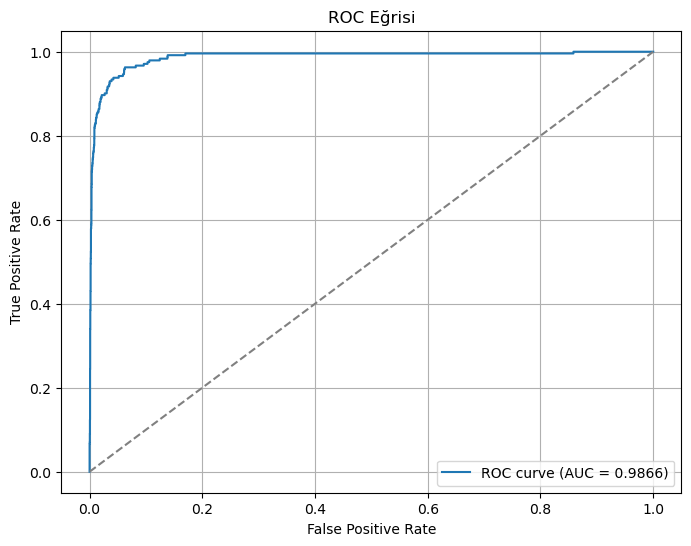

In [33]:
y_proba = best_model.predict_proba(X_test_fe)[:, 1]

# ROC AUC skoru
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# ROC eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Lift Grafiği

   decile  response_rate      lift
0       0       0.440154  9.408756
1       1       0.023211  0.496156
2       2       0.001934  0.041346
3       3       0.000000  0.000000
4       4       0.000000  0.000000
5       5       0.000000  0.000000
6       6       0.000000  0.000000
7       7       0.000000  0.000000
8       8       0.001934  0.041346
9       9       0.000000  0.000000


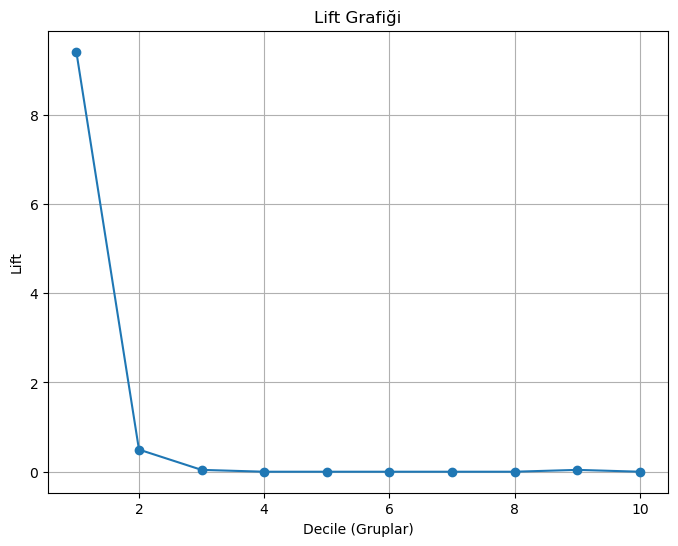

In [34]:
df_lift = pd.DataFrame({
    'y_true': y_test,
    'y_proba': y_proba
})

# Olasılığa göre azalan sırala
df_lift = df_lift.sort_values(by='y_proba', ascending=False).reset_index(drop=True)

# Veri setini eşit büyüklükte n gruba böl 
n_groups = 10
df_lift['decile'] = pd.qcut(df_lift.index, q=n_groups, labels=False)

# Her decile'daki pozitif oranı (başarı oranı)
lift_table = df_lift.groupby('decile').agg(
    total=('y_true', 'count'),
    positives=('y_true', 'sum')
).reset_index()

lift_table['response_rate'] = lift_table['positives'] / lift_table['total']

# Genel başarı oranı (baseline)
baseline = df_lift['y_true'].mean()

# Lift: decile başına başarı oranı / genel başarı oranı
lift_table['lift'] = lift_table['response_rate'] / baseline

print(lift_table[['decile', 'response_rate', 'lift']])

# Grafik
plt.figure(figsize=(8,6))
plt.plot(lift_table['decile'] + 1, lift_table['lift'], marker='o')
plt.xlabel('Decile (Gruplar)')
plt.ylabel('Lift')
plt.title('Lift Grafiği')
plt.grid(True)
plt.show()


In [35]:
# En iyi %10'luk grup decile==0 
best_decile = lift_table[lift_table['decile'] == 0]

print("En iyi %10'luk grup (decile=0) başarı oranı ve lift değeri:")
print(best_decile[['response_rate', 'lift']])


En iyi %10'luk grup (decile=0) başarı oranı ve lift değeri:
   response_rate      lift
0       0.440154  9.408756


In [36]:
top_10_df = df_lift[df_lift['decile'] == 0]
print(f"En iyi %10'luk gruptaki gözlem sayısı: {len(top_10_df)}")
print(f"En iyi %10'luk gruptaki pozitif sayısı: {top_10_df['y_true'].sum()}")


En iyi %10'luk gruptaki gözlem sayısı: 518
En iyi %10'luk gruptaki pozitif sayısı: 228


In [37]:
# Örneğin, test setindeki tüm gözlemleri ve onların decile bilgisini görmek için:
X_test_with_decile = X_test.copy()
X_test_with_decile['decile'] = df_lift['decile'].values  # indexler uyuyorsa ekleyebilirsin

# En iyi %10'luk gruptaki gözlemler
best_10_percent = X_test_with_decile[X_test_with_decile['decile'] == 0]

print(f"En iyi %10'luk gruptaki gözlem sayısı: {len(best_10_percent)}")
print(best_10_percent.head())  # İlk birkaç satır



En iyi %10'luk gruptaki gözlem sayısı: 518
       Column1  musterilik_yas  maas_flag  must_hesap_sube_sayi  \
4483      4483              21          0                     1   
1078      1078             164          1                     1   
10965    10965             202          1                     1   
4362      4362              66          1                     2   
169        169             230          0                     1   

       kanuni_takip_drm  hesap_isl_ucret_flag  vdsz_deg_1  vdsz_deg_2  \
4483                  0                     0           0           0   
1078                  0                     0         -99        6462   
10965                 0                     0           2         -51   
4362                  0                     2         -47          -2   
169                   0                     0           0           0   

       vdli_deg_1  vdli_deg_2  ...  chrn_must_yakin_izleme_acik_flag  ref_yas  \
4483            0           0  ...